# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

## Изучение данных из файла

### Загрузка данных и библиотеки пандас.

In [1]:
import pandas as pd
import numpy as np
import os

pth1 = '\\Users\Home\Desktop\дата.csv' # Локальный путь
pth2 = '/datasets/real_estate_data.csv' # Серверный путь

if os.path.exists(pth1):
    data = pd.read_csv(pth1, sep='\t')
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, sep='\t')
else:
    print('Something is wrong')  

data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Выведем сводную информацию по датасету.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выполним переименование столбца cityCenters_nearest в city_center_nearest, так будет привычнее обращаться к нему.

In [3]:
data = data.rename(columns = {'cityCenters_nearest':'city_center_nearest'})

In [4]:
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN


Столбец переименован.

### Вывод
Исходные данные содержат пропуски и ошибки в виде неверного типа данных. Проанализируем каждый столбец по отдельности более подробно далее.

## Предобработка данных

Проверим каждый столбец на наличие ошибок и артефактов по отдельности.

### total_images. (число фотографий квартиры в объявлении)

In [5]:
#Поссмотрим уникальные значения.
data['total_images'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,
       37, 39, 42, 50])

In [6]:
column = 'total_images'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 0 шт. - 0.0 % от общего числа строк.


Пропусков данных нет, тип данных подходящий - все в порядке.

### last_price. (цена на момент снятия с публикации)

In [7]:
#Поссмотрим уникальные значения.
data['last_price'].sort_values().unique()

array([1.219e+04, 4.300e+05, 4.400e+05, ..., 4.013e+08, 4.200e+08,
       7.630e+08])

In [8]:
column = 'last_price'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 0 шт. - 0.0 % от общего числа строк.


Пропусков данных нет, тип данных подходящий - все в порядке.

### total_area. (площадь квартиры в квадратных метрах (м²))

In [9]:
#Поссмотрим уникальные значения.
data['total_area'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

In [10]:
column = 'total_area'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 0 шт. - 0.0 % от общего числа строк.


Пропусков данных нет, тип данных подходящий - все в порядке.

### first_day_exposition. (дата публикации)

In [11]:
data['first_day_exposition']

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object

В таком формате данные времени плохо читаемы, заменим представление на более читаемый вид.

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [13]:
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

Заменили формат представления времени, теперь он четаемый и нет указания часы-минуты-секунды, в данном контексте это лишнее.

### rooms. (число комнат)

In [14]:
column = 'rooms'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 0 шт. - 0.0 % от общего числа строк.


In [15]:
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19])

In [16]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [17]:
column = 'rooms'
print('Кол-во строк со значением "0":', len(data[(data['rooms'] == 0) & (data['is_apartment'] != True)]), 'шт.', '-', 
      round(len(data[(data['rooms'] == 0) & (data['is_apartment'] != True)]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк со значением "0": 197 шт. - 0.83 % от общего числа строк.


Удалим строки с 10*тью комнатами и более - это 11 строк всего.

In [18]:
list_values = data[data['rooms'] >= 10]['rooms'].sort_values().unique()

for i in list_values:
    data = data.drop(data[data['rooms'] == i].index)
    

In [19]:
data['rooms'].value_counts()

1    8047
2    7940
3    5814
4    1180
5     326
0     197
6     105
7      59
8      12
9       8
Name: rooms, dtype: int64

In [20]:
#Удалим эти строки.
#data = data.query('rooms == 0 and is_apartment != True').drop()
#data = data.drop(data[(data['rooms'] == 0) & (data['is_apartment'] != True)].index)
#column = 'rooms'
#print('Кол-во строк со значением "0":', len(data[(data['rooms'] == 0) & (data['is_apartment'] != True)]), 'шт.', '-', 
#      round(len(data[(data['rooms'] == 0) & (data['is_apartment'] != True)]) / len(data[column]) * 100, 2), '% от общего числа строк.')
#data.query('rooms == 0 and is_apartment != True')

### floors_total. (всего этажей в доме)

In [21]:
data['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

In [22]:
column = 'floors_total'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 86 шт. - 0.36 % от общего числа строк.


Восстановить данные по этажности дома не представляется возможным и кол-во таких строк менее полупроцента. Удалим эти строки.

In [23]:
data = data.dropna(subset=['floors_total'])

In [24]:
column = 'floors_total'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 0 шт. - 0.0 % от общего числа строк.


Строки удалены.

Правильнее и нагляднее будет работать со столбцом 'floors_total' в типе int. Переведем столбец в бругой тип данных.

In [25]:
data['floors_total'] = pd.to_numeric(data['floors_total'], errors='coerce',downcast='integer')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23602 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23602 non-null  int64         
 1   last_price            23602 non-null  float64       
 2   total_area            23602 non-null  float64       
 3   first_day_exposition  23602 non-null  datetime64[ns]
 4   rooms                 23602 non-null  int64         
 5   ceiling_height        14486 non-null  float64       
 6   floors_total          23602 non-null  int8          
 7   living_area           21732 non-null  float64       
 8   floor                 23602 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23602 non-null  bool          
 11  open_plan             23602 non-null  bool          
 12  kitchen_area          21371 non-null  float64       
 13  balcony         

### ceiling_height. (высота потолков (м))

<div class="alert alert-info">
<h2> Комментарий студента</h2>
Не буду производить замены по высоте потолка, посмотрим какой эффект это даст на определение цены. Заменим пропуски на медиану по всем значениям.
    
Исходный код закоиентирую.
</div>

In [27]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [28]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,   3.5 ,
      

Столбец содержит только положительныйе значения - float64, но присутствуют "Nan" и значения с подозрительно очень высоким и низким потолком. На данный момент есть предположения - заменить наны на медиану или среднее знач, а может присутствует ошибка в порядке числа. Высокие и низкие значения надо проверить отдельно, построчно.

In [29]:
column = 'ceiling_height'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 0 шт. - 0.0 % от общего числа строк.


Согласно нормативным строительным документам - сегодня минимальной нормой в России считается высота потолка 2,4 метра. В новостройках обычно это значение находится в пределах 2,5-2,7 метра. Для элитного жилья показатель может превышать 3 метра. Для максимальной высоты потолка в многоквартирном доме нормативы отсутствуют. Максимальный уровень потолков СНиП вообще не регламентирует. Практика показывает, что в современных многоквартирных домах он, как правило, не поднимается выше 3,2 м. Определим реальные значения высоты потолка 2,4 - 3,6м, все остальные значения заменим на среднее значение по выборке с учетом общего кол-ва этажей в доме. Выдвинем предположение, что в домах с одинаковой эажностью, высоты потолков будут максимально схожи.

Т.к. кол-во значений с Nan имеет большую долю в общем кол-ве строк, то исправим сначала эти данные. Соберем список, в котором будут значения общей этажности домов, строки которых имеют пропуски в колонке ceiling_height.

In [30]:
#ceiling_height_bug_list_Na = data[data['ceiling_height'].isna()]['floors_total'].sort_values().unique()
#ceiling_height_bug_list_Na

Напишем цикл, которая заменит Nan в столбце 'ceiling_height' на среднее значение среди домов такой же этажности и высотой потолков в диапазоне 2,4 - 3,6м.

In [31]:
#ceiling_height_bug_list_Na = data[data['ceiling_height'].isna()]['floors_total'].sort_values().unique()

#list_total_floor_index = ceiling_height_bug_list_Na
#for total_floor_index in list_total_floor_index:
#    sl_index = len(data.query('ceiling_height >= 2.4 and ceiling_height <= 3.6 and floors_total == @total_floor_index')[
#    'ceiling_height'])
#    m_value = data[(data['ceiling_height'].isna()) & 
#                   (data['floors_total'] == total_floor_index)]['ceiling_height'].fillna(value=round(data.query(
#    'ceiling_height >= 2.4 and ceiling_height <= 3.6 and floors_total == @total_floor_index')[
#    'ceiling_height'].mean(),2))
#    data.loc[(data['ceiling_height'].isna()) & (data['floors_total'] == total_floor_index), 'ceiling_height'] = m_value    

In [32]:
#column = 'ceiling_height'
#print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
#      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

In [33]:
#data[data[column].isna()]

Одно значение не было земенено, т.к. для этого значения небыло расчитано среднее. Это строка №11575
со значением floors_total = 33. Заменим высоту потолка вручную на среднее значение по всему датасету из условия - высота в пределах 2,4-3,6м.

In [34]:
#m_value = round(data.query('ceiling_height >= 2.4 and ceiling_height <= 3.6')['ceiling_height'].mean(),2)
#data.loc[(data['ceiling_height'].isna()) & (data['floors_total'] == 33), 'ceiling_height'] = m_value

In [35]:
#column = 'ceiling_height'
#print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
#      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

In [36]:
#Заменим все значения этажей ниже 2,4м на 2,4м
#data.loc[data['ceiling_height'] < 2.4, 'ceiling_height'] = 2.4

#Заменим все значения этажей выше 3,6м на 3,6м
#data.loc[data['ceiling_height'] > 3.6, 'ceiling_height'] = 3.6

#data['ceiling_height'].sort_values().unique()

### living_area. (жилая площадь в квадратных метрах (м²))

In [37]:
column = 'living_area'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 1870 шт. - 7.92 % от общего числа строк.


In [38]:
data[data['living_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19,1,2.65,9,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28,2,2.50,5,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18,1,2.65,22,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


<div class="alert alert-info">
<h2> Комментарий студента</h2>
Заменим данные с пропусками на медиану в зависимости от числа комнат.
    
Исходный код закоментирую.
</div>

In [39]:
living_area_bug_list_rooms = data[data['living_area'].isna()]['rooms'].sort_values().unique()

list_living_area_index = living_area_bug_list_rooms
for rooms_index in list_living_area_index:
    sl_index = len(data.query('living_area >= 0 and rooms == @rooms_index')[
    'rooms'])
    m_value = data[(data['living_area'].isna()) & 
                   (data['rooms'] == rooms_index)]['living_area'].fillna(value=round(data.query(
    'living_area >= 0 and rooms == @rooms_index')[
    'living_area'].median(),2))
    data.loc[(data['living_area'].isna()) & (data['rooms'] == rooms_index), 'living_area'] = m_value

In [40]:
column = 'living_area'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 0 шт. - 0.0 % от общего числа строк.


In [41]:
#Проверим результат
data.loc[[3,7,30,37,44],['total_area', 'living_area']]

,total_area,living_area
3,159.0,45.0
7,71.6,30.5
30,32.8,17.6
37,45.8,30.5
44,40.0,17.6


In [42]:
data['living_area'].sort_values().value_counts()

18.00    893
17.60    743
30.50    700
17.00    674
30.00    598
        ... 
43.81      1
54.43      1
86.10      1
99.70      1
16.74      1
Name: living_area, Length: 1761, dtype: int64

In [43]:
#Заменим пропуски значениями из колонки общей площади - не критично.
#data.loc[data['living_area'].isna(), 'living_area'] = data['total_area']

### floor. (этаж)

In [44]:
data['floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [45]:
column = 'floor'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 0 шт. - 0.0 % от общего числа строк.


Пропусков данных нет, тип данных подходящий - все в порядке.

### is_apartment. (апартаменты (булев тип))

In [46]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [47]:
column = 'is_apartment'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 20827 шт. - 88.24 % от общего числа строк.


Судя по кол-ву строк с пропусками, вероятнее всего пользователи пропустили эту колонку или имеет место быть систематическая ошибка. Но я склонен думать, что 88% объявлений это всё-таки квартиры, а не апартаменты. Принимая это во внимание, заменю пропуски в данных на значение - False, что означает - что объявление о продаже сделано по квартире.

In [48]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

In [49]:
column = 'is_apartment'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 0 шт. - 0.0 % от общего числа строк.


In [50]:
data['is_apartment'].value_counts()

False    23552
True        50
Name: is_apartment, dtype: int64

### kitchen_area. (площадь кухни в квадратных метрах (м²))

In [51]:
data['kitchen_area'].sort_values().unique()

array([  1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,   3.3 ,
         3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,
         4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,
         5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,
         5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,
         5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,
         5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,
         5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,
         6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,
         6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,
         6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,
         6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,
         6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,
         7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,
      

In [52]:
column = 'kitchen_area'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 2231 шт. - 9.45 % от общего числа строк.


<div class="alert alert-info">
<h2> Комментарий студента</h2>
Заменим данные с пропусками на медиану в зависимости от числа комнат.
    
Исходный код закоментирую.
</div>

In [53]:
data[data['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19,1,2.65,9,17.6,2,False,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28,2,2.50,5,30.5,1,False,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18,1,2.65,22,17.6,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06,1,2.65,13,17.6,13,False,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08,1,2.56,18,19.6,10,False,...,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12,4,2.55,10,63.5,1,False,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08,1,2.80,9,17.6,2,False,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.0,2017-12-08,1,2.65,9,17.6,4,False,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [54]:
data[data['kitchen_area'].isna()]['rooms'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [55]:
kitchen_area_bug_list_rooms = data[data['kitchen_area'].isna()]['rooms'].sort_values().unique()

list_kitchen_area_index = kitchen_area_bug_list_rooms
for kitchen_index in list_kitchen_area_index:
    sl_index = len(data.query('kitchen_area >= 0 and rooms == @rooms_index')[
    'rooms'])
    m_value = data[(data['kitchen_area'].isna()) & 
                   (data['rooms'] == kitchen_index)]['kitchen_area'].fillna(value=round(data.query(
    'kitchen_area >= 0 and rooms == @kitchen_index')[
    'kitchen_area'].median(),2))
    data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == kitchen_index), 'kitchen_area'] = m_value

In [56]:
column = 'kitchen_area'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 194 шт. - 0.82 % от общего числа строк.


Оставшиеся строки заменим на медиану по всем данным площади кухни.

In [57]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

In [58]:
column = 'kitchen_area'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 0 шт. - 0.0 % от общего числа строк.


Заполним пропуски, т.к. total_area и living_area больше не содержат пропуски, следующими значениями:
 - при условии, что total_area и living_area равны, тогда kitchen_area = total_area;
 - при условии, что total_area и living_area не равны, тогда kitchen_area = total_area - living_area и разница больше нуля, если разница меньше нуля, то kitchen_area = total_area;

In [59]:
#Соберем лист из индексов датасета в которых будет выполнять условие
#ind_list_above_zero = data[(data['total_area'] != data['living_area']) & (data['kitchen_area'].isna()) & 
#                           ((data['total_area'] - data['living_area']) > 0)].index.values.astype(int)
#ind_list_above_zero.shape

In [60]:
#Проведем засену строк.
#for idx in ind_list_above_zero:
#    data.loc[idx, 'kitchen_area'] = data.loc[idx, 'total_area'] - data.loc[idx, 'living_area']

In [61]:
#Проверим лист из индексов датасета в которых будет выполнять условие
#ind_list_above_zero = data[(data['total_area'] != data['living_area']) & (data['kitchen_area'].isna()) & 
#                           ((data['total_area'] - data['living_area']) > 0)].index.values.astype(int)
#ind_list_above_zero.shape

Значит данные заменены.

In [62]:
#Соберем лист из индексов датасета в которых будет выполнять условие
#ind_list_zub_zero = data[(data['total_area'] != data['living_area']) & (data['kitchen_area'].isna()) & 
#                         ((data['total_area'] - data['living_area']) < 0)].index.values.astype(int)
#ind_list_zub_zero.shape

Нет строк удовлетворяющих этому условию, замены проводить не требуется.

In [63]:
#Соберем лист из индексов датасета в которых будет выполнять условие
#ind_list = data[(data['total_area'] == data['living_area']) & (data['kitchen_area'].isna())].index.values.astype(int)
#ind_list.shape

In [64]:
#Проведем засену строк.
#for idx in ind_list:
#    data.loc[idx, 'kitchen_area'] = data.loc[idx, 'total_area']

In [65]:
#Проверим лист из индексов датасета в которых будет выполнять условие
#ind_list = data[(data['total_area'] == data['living_area']) & (data['kitchen_area'].isna())].index.values.astype(int)
#ind_list.shape

Значит данные заменены.

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23602 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23602 non-null  int64         
 1   last_price            23602 non-null  float64       
 2   total_area            23602 non-null  float64       
 3   first_day_exposition  23602 non-null  datetime64[ns]
 4   rooms                 23602 non-null  int64         
 5   ceiling_height        23602 non-null  float64       
 6   floors_total          23602 non-null  int8          
 7   living_area           23602 non-null  float64       
 8   floor                 23602 non-null  int64         
 9   is_apartment          23602 non-null  bool          
 10  studio                23602 non-null  bool          
 11  open_plan             23602 non-null  bool          
 12  kitchen_area          23602 non-null  float64       
 13  balcony         

### balcony. (число балконов)

Заменим пропуски в данных на 0, т.к. скорее всего данные отсутствуют именно потому, что пользователь не стал указывать данные.

In [67]:
data['balcony'] = data['balcony'].fillna(0)

In [68]:
data['balcony'].sort_values().unique()

array([0., 1., 2., 3., 4., 5.])

Для дальнейшей работы удобнее работать со столбцом 'balcony' в типе int. Переведем столбец в другой тип данных - Интежер(челочисленный).

In [69]:
data['balcony'] = pd.to_numeric(data['balcony'], errors='coerce',downcast='integer')

In [70]:
data['balcony'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int8)

### locality_name. (название населённого пункта)

In [71]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Часть значений населенных пунктов указана с типом населенного рункта, а часть без. Уберем обозначение типов нас.пунк. для того что бы выявить наличие неявных дубликатов.

In [72]:
print('Кол-во строк без данных в столбце locality_name:',data['locality_name'].isna().sum(), 'шт. - ', data['locality_name'].isna().sum() / len(data['locality_name']) * 100, '%')

Кол-во строк без данных в столбце locality_name: 48 шт. -  0.20337259554275064 %


In [73]:
#Удалим строки с отсутствующими значениями 'locality_name'
data = data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum()

0

In [74]:
#Создандим новый столбец с копией существующео.
data['locality_name_copy'] = data['locality_name']

In [75]:
#После удаления строк сбросим индексы в датасете.
data.reset_index()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,balcony,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_copy
0,0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,посёлок Шушары
2,2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,3,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.0,9,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23549,23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,...,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,Санкт-Петербург
23550,23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,...,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Тосно
23551,23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,...,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,село Рождествено
23552,23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,...,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,Санкт-Петербург


Напишем функцию с помощью которой последовательно удалим из ячеек все обозначения типов населенных пунктов.

In [76]:
def replace_city_name(wrong_name, good_name):
    for idx in data['locality_name'].index:

        #Указываем серию с которой будем работать
        ser_ies = data.loc[idx, 'locality_name'].split()

        #Передаем переменные
        #wrong_name = 'посёлок'
        #good_name = 'п.'
        ser_ies_new = []
        
        #Поиск и замена переданных значений в указанной серии
        for ind in range(len(ser_ies)):
            if ser_ies[ind] in wrong_name:
                temp_str = ser_ies[ind].replace(wrong_name, good_name).lstrip()
            else:
                temp_str = ser_ies[ind]

            ser_ies_new.append(temp_str)

        #Сборка серии в строку
        final_res = " ".join(ser_ies_new)

        #Возврат измененного значения серии
        data.loc[idx, 'locality_name'] = final_res
    return

In [77]:
#Закоментил все вызовы функции, для ускорения работы , а так же они нужны только для определения дубликатов, которых по факту не оказалось.
#replace_city_name(wrong_name='поселок', good_name='')
#replace_city_name(wrong_name='посёлок', good_name='')
#replace_city_name(wrong_name='городской', good_name='')
#replace_city_name(wrong_name='городского', good_name='')
#replace_city_name(wrong_name='типа', good_name='')
#replace_city_name(wrong_name='садовое', good_name='')
#replace_city_name(wrong_name='товарищество', good_name='')
#replace_city_name(wrong_name='деревня', good_name='')
#replace_city_name(wrong_name='имени', good_name='')
#replace_city_name(wrong_name='село', good_name='')
#replace_city_name(wrong_name='железнодорожной', good_name='')
#replace_city_name(wrong_name='станции', good_name='')
#replace_city_name(wrong_name='садоводческое', good_name='')
#replace_city_name(wrong_name='некоммерческое', good_name='')
#replace_city_name(wrong_name='при', good_name='')
#replace_city_name(wrong_name='коттеджный', good_name='')

После работы функции получим названия населенных пунктов без типа. Теперь можно проверить данные на неявные дубликаты.

In [78]:
data['locality_name_lower'] = data['locality_name']

In [79]:
data['locality_name_lower']

0            Санкт-Петербург
1             посёлок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name_lower, Length: 23554, dtype: object

In [80]:
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_copy,locality_name_lower
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,Санкт-Петербург


In [81]:
for item in data['locality_name'].index:
    data.loc[item, 'locality_name_lower'] = data.loc[item, 'locality_name'].lower()
data['locality_name_lower']

0            санкт-петербург
1             посёлок шушары
2            санкт-петербург
3            санкт-петербург
4            санкт-петербург
                ...         
23694        санкт-петербург
23695                  тосно
23696       село рождествено
23697        санкт-петербург
23698    поселок новый учхоз
Name: locality_name_lower, Length: 23554, dtype: object

Теперь посчитаем уникальные значения в колонках locality_name_lower и locality_name и если кол-во для каждого значения будут совпадать, значит неявных дубликатов нет.

In [82]:
locality_name_lower_list = data['locality_name_lower'].value_counts()

In [83]:
locality_name_list = data['locality_name'].value_counts()

In [84]:
locality_name_lower_list

санкт-петербург               15640
посёлок мурино                  520
посёлок шушары                  439
всеволожск                      398
пушкин                          369
                              ...  
деревня тойворово                 1
поселок усть-луга                 1
поселок лисий нос                 1
поселок красносельское            1
садовое товарищество садко        1
Name: locality_name_lower, Length: 364, dtype: int64

In [85]:
locality_name_list

Санкт-Петербург                               15640
посёлок Мурино                                  520
посёлок Шушары                                  439
Всеволожск                                      398
Пушкин                                          369
                                              ...  
садовое товарищество Рахья                        1
деревня Кисельня                                  1
поселок Жилгородок                                1
посёлок при железнодорожной станции Вещево        1
деревня Большая Пустомержа                        1
Name: locality_name, Length: 364, dtype: int64

In [86]:
for index in range(len(locality_name_lower_list)):
    if locality_name_lower_list[index] != locality_name_list[index]:
        print('Проверь число -', index)
    else:
        print('Индекс -', index, 'все сходится.')

Индекс - 0 все сходится.
Индекс - 1 все сходится.
Индекс - 2 все сходится.
Индекс - 3 все сходится.
Индекс - 4 все сходится.
Индекс - 5 все сходится.
Индекс - 6 все сходится.
Индекс - 7 все сходится.
Индекс - 8 все сходится.
Индекс - 9 все сходится.
Индекс - 10 все сходится.
Индекс - 11 все сходится.
Индекс - 12 все сходится.
Индекс - 13 все сходится.
Индекс - 14 все сходится.
Индекс - 15 все сходится.
Индекс - 16 все сходится.
Индекс - 17 все сходится.
Индекс - 18 все сходится.
Индекс - 19 все сходится.
Индекс - 20 все сходится.
Индекс - 21 все сходится.
Индекс - 22 все сходится.
Индекс - 23 все сходится.
Индекс - 24 все сходится.
Индекс - 25 все сходится.
Индекс - 26 все сходится.
Индекс - 27 все сходится.
Индекс - 28 все сходится.
Индекс - 29 все сходится.
Индекс - 30 все сходится.
Индекс - 31 все сходится.
Индекс - 32 все сходится.
Индекс - 33 все сходится.
Индекс - 34 все сходится.
Индекс - 35 все сходится.
Индекс - 36 все сходится.
Индекс - 37 все сходится.
Индекс - 38 все сходит

Т.к. списки locality_name_lower_list и locality_name_list отсортированы по убыванию кол-ва совпадений и кол-во элементов списка одинаковое - 306шт. можно с увереностью заявить, что дубликатов нет.

### airports_nearest. (расстояние до ближайшего аэропорта в метрах (м))

In [87]:
data['airports_nearest'].sort_values().unique()

array([    0.,  6450.,  6914., ..., 84853., 84869.,    nan])

In [88]:
column = 'airports_nearest'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 5524 шт. - 23.45 % от общего числа строк.


Большое кол-во строк с пропусками, т.к. эти строки заполняются автоматически системой, необходимо дать знать разработчикам об этом. Для корректной работы далее заменим пропуски на значение "0".

In [89]:
data['airports_nearest'] = data['airports_nearest'].fillna(0)

In [90]:
column = 'airports_nearest'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 0 шт. - 0.0 % от общего числа строк.


### city_center_nearest. (расстояние до центра города (м))

In [91]:
data['city_center_nearest'].sort_values().unique()

array([  181.,   208.,   215., ..., 65952., 65968.,    nan])

In [92]:
column = 'city_center_nearest'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 5501 шт. - 23.35 % от общего числа строк.


Большое кол-во строк с пропусками, т.к. эти строки заполняются автоматически -  системой, необходимо дать знать разработчикам об этом. Для корректной работы далее заменим пропуски на значение "0".

In [93]:
data['city_center_nearest'] = data['city_center_nearest'].fillna(0)

In [94]:
column = 'city_center_nearest'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 0 шт. - 0.0 % от общего числа строк.


### open_plan. (свободная планировка (булев тип))

In [95]:
column = 'open_plan'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 0 шт. - 0.0 % от общего числа строк.


In [96]:
data['open_plan'].value_counts()

False    23487
True        67
Name: open_plan, dtype: int64

Нулевых значений нет, пропусков нет. все ок, столбец впорядке.

### parks_around3000. (число парков в радиусе 3 км)

In [97]:
data['parks_around3000'].sort_values().unique()

array([ 0.,  1.,  2.,  3., nan])

In [98]:
column = 'parks_around3000'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 5500 шт. - 23.35 % от общего числа строк.


In [99]:
data['parks_around3000'].value_counts()

0.0    10035
1.0     5642
2.0     1736
3.0      641
Name: parks_around3000, dtype: int64

Большое кол-во строк с пропусками, т.к. эти строки заполняются автоматически -  системой, необходимо дать знать разработчикам об этом. Для корректной работы далее заменим пропуски на значение "0".

In [100]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [101]:
column = 'parks_around3000'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 0 шт. - 0.0 % от общего числа строк.


### parks_nearest. (расстояние до ближайшего парка (м))

In [102]:
column = 'parks_nearest'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 15531 шт. - 65.94 % от общего числа строк.


Большое кол-во строк с пропусками, т.к. эти строки заполняются автоматически -  системой, необходимо дать знать разработчикам об этом. Для корректной работы далее заменим пропуски на значение "0".

In [103]:
data['parks_nearest'] = data['parks_nearest'].fillna(0)

In [104]:
column = 'parks_nearest'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 0 шт. - 0.0 % от общего числа строк.


### ponds_around3000. (число водоёмов в радиусе 3 км)

In [105]:
column = 'ponds_around3000'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 5500 шт. - 23.35 % от общего числа строк.


Большое кол-во строк с пропусками, т.к. эти строки заполняются автоматически -  системой, необходимо дать знать разработчикам об этом. Для корректной работы далее заменим пропуски на значение "0".

In [106]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [107]:
column = 'ponds_around3000'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 0 шт. - 0.0 % от общего числа строк.


### ponds_nearest. (расстояние до ближайшего водоёма (м))

In [108]:
column = 'ponds_nearest'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 14525 шт. - 61.67 % от общего числа строк.


Большое кол-во строк с пропусками, т.к. эти строки заполняются автоматически -  системой, необходимо дать знать разработчикам об этом. Для корректной работы далее заменим пропуски на значение "0".

In [109]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

In [110]:
column = 'ponds_nearest'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 0 шт. - 0.0 % от общего числа строк.


### studio. (квартира-студия)

In [111]:
column = 'studio'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 0 шт. - 0.0 % от общего числа строк.


In [112]:
data['studio'].value_counts()

False    23408
True       146
Name: studio, dtype: int64

Нулевых значений нет, пропусков нет. все ок, столбец впорядке.

### days_exposition. (сколько дней было размещено объявление (от публикации до снятия))

<div class="alert alert-info">
<h2> Комментарий студента</h2>
Будем считать, что пропуски в данных говорят о том, что объявление еще активно. Заменим пропуски в данных на «0», для того чтобы потом для наглядности перевести данные в целочисленный вид.

Исходный код закоментирую.
</div>

In [113]:
#Заменим пропуски в данных на среднее значения
data['days_exposition'] = data['days_exposition'].fillna(0)

In [114]:
column = 'days_exposition'
print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Кол-во строк с пропусками: 0 шт. - 0.0 % от общего числа строк.


In [115]:
#Среднее значение кол-ва дней
#value = round(data[~data['days_exposition'].isna()]['days_exposition'].mean(), 0)

#Заменим пропуски в данных на среднее значения
#data['days_exposition'] = data['days_exposition'].fillna(value)

In [116]:
#column = 'days_exposition'
#print('Кол-во строк с пропусками:', len(data[data[column].isna()]), 'шт.', '-', 
#      round(len(data[data[column].isna()]) / len(data[column]) * 100, 2), '% от общего числа строк.')

Для дальнейшей работы удобнее работать со столбцом 'days_exposition' в типе int. Переведем столбец в бругой тип данных.

In [117]:
data['days_exposition'] = pd.to_numeric(data['days_exposition'], errors='coerce',downcast='integer')

In [118]:
data['days_exposition'].sort_values().value_counts()

0       3169
45       879
60       538
7        234
30       208
        ... 
1112       1
1080       1
1064       1
1032       1
1391       1
Name: days_exposition, Length: 1139, dtype: int64

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23554 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23554 non-null  int64         
 1   last_price            23554 non-null  float64       
 2   total_area            23554 non-null  float64       
 3   first_day_exposition  23554 non-null  datetime64[ns]
 4   rooms                 23554 non-null  int64         
 5   ceiling_height        23554 non-null  float64       
 6   floors_total          23554 non-null  int8          
 7   living_area           23554 non-null  float64       
 8   floor                 23554 non-null  int64         
 9   is_apartment          23554 non-null  bool          
 10  studio                23554 non-null  bool          
 11  open_plan             23554 non-null  bool          
 12  kitchen_area          23554 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

### Определим цену квадратного метра недвижимости

In [120]:
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_copy,locality_name_lower
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,Санкт-Петербург,санкт-петербург


In [121]:
data['sq_metr_price'] = round(data['last_price'] / data['total_area'], 1)

In [122]:
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_copy,locality_name_lower,sq_metr_price
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,0,Санкт-Петербург,санкт-петербург,120370.4


### Добавим колонки с днем недели, месяцем, годом публикации объявления.

In [123]:
data['week_day'] = data['first_day_exposition'].dt.weekday
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_copy,locality_name_lower,sq_metr_price,week_day
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,0,Санкт-Петербург,санкт-петербург,120370.4,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0.0,0.0,0.0,0.0,81,посёлок Шушары,посёлок шушары,82920.8,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558,Санкт-Петербург,санкт-петербург,92785.7,3


In [124]:
data['month'] = data['first_day_exposition'].dt.month
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_copy,locality_name_lower,sq_metr_price,week_day,month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,0,Санкт-Петербург,санкт-петербург,120370.4,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,0.0,0.0,0.0,81,посёлок Шушары,посёлок шушары,82920.8,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558,Санкт-Петербург,санкт-петербург,92785.7,3,8


In [125]:
data['year'] = data['first_day_exposition'].dt.year
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_copy,locality_name_lower,sq_metr_price,week_day,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,0,Санкт-Петербург,санкт-петербург,120370.4,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,0.0,0.0,81,посёлок Шушары,посёлок шушары,82920.8,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558,Санкт-Петербург,санкт-петербург,92785.7,3,8,2015


### Добавим этаж квартиры в виде категорийных данных

In [126]:
data['floor_category'] = data['floor']
data
for index in data['floor_category'].index:
    if data.loc[index, 'floor'] == 1:
        data.loc[index, 'floor_category'] = 'первый'
    elif data.loc[index, 'floor'] == data.loc[index, 'floors_total']:
        data.loc[index, 'floor_category'] = 'последний'
    else:
        data.loc[index, 'floor_category'] = 'другой'

<div class="alert alert-block alert-warning">


### Комментарий от ревьюера v_1
Рекомендация

А зачем здесь обращение через Loc? Замедляешь работу, быстрее сделать через функцию и apply
</div>

In [127]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_copy,locality_name_lower,sq_metr_price,week_day,month,year,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,0,Санкт-Петербург,санкт-петербург,120370.4,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,0.0,81,посёлок Шушары,посёлок шушары,82920.8,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558,Санкт-Петербург,санкт-петербург,92785.7,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,3.0,234.0,424,Санкт-Петербург,санкт-петербург,408176.1,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121,Санкт-Петербург,санкт-петербург,100000.0,1,6,2018,другой


In [128]:
data['floor_category'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

### Добавим отношение жилой к общей площади и отношение площади кухни к общей.

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23554 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23554 non-null  int64         
 1   last_price            23554 non-null  float64       
 2   total_area            23554 non-null  float64       
 3   first_day_exposition  23554 non-null  datetime64[ns]
 4   rooms                 23554 non-null  int64         
 5   ceiling_height        23554 non-null  float64       
 6   floors_total          23554 non-null  int8          
 7   living_area           23554 non-null  float64       
 8   floor                 23554 non-null  int64         
 9   is_apartment          23554 non-null  bool          
 10  studio                23554 non-null  bool          
 11  open_plan             23554 non-null  bool          
 12  kitchen_area          23554 non-null  float64       
 13  balcony         

In [130]:
data['living_part'] = round(data['living_area'] / data['total_area'], 2)
data['kitchen_part'] = round(data['kitchen_area'] / data['total_area'], 2)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,locality_name_copy,locality_name_lower,sq_metr_price,week_day,month,year,floor_category,living_part,kitchen_part
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,санкт-петербург,120370.4,3,3,2019,другой,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,81,посёлок Шушары,посёлок шушары,82920.8,1,12,2018,первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,558,Санкт-Петербург,санкт-петербург,92785.7,3,8,2015,другой,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,424,Санкт-Петербург,санкт-петербург,408176.1,4,7,2015,другой,0.28,0.06
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,121,Санкт-Петербург,санкт-петербург,100000.0,1,6,2018,другой,0.32,0.41


<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера v_1
Отлично
    
Отлично, все расчеты верны 👍🏻
</div>

## Исследовательский анализ данных

### Построим гистограммы для параметров - площадь, цена, число комнат, высота потолков.

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

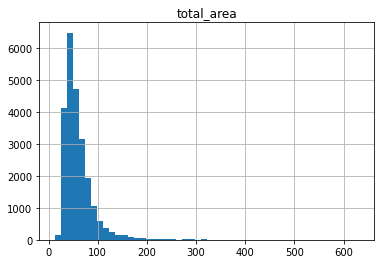

In [131]:
data.hist('total_area',bins=50)

Отсечем квартиры с площадью более 200м2

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

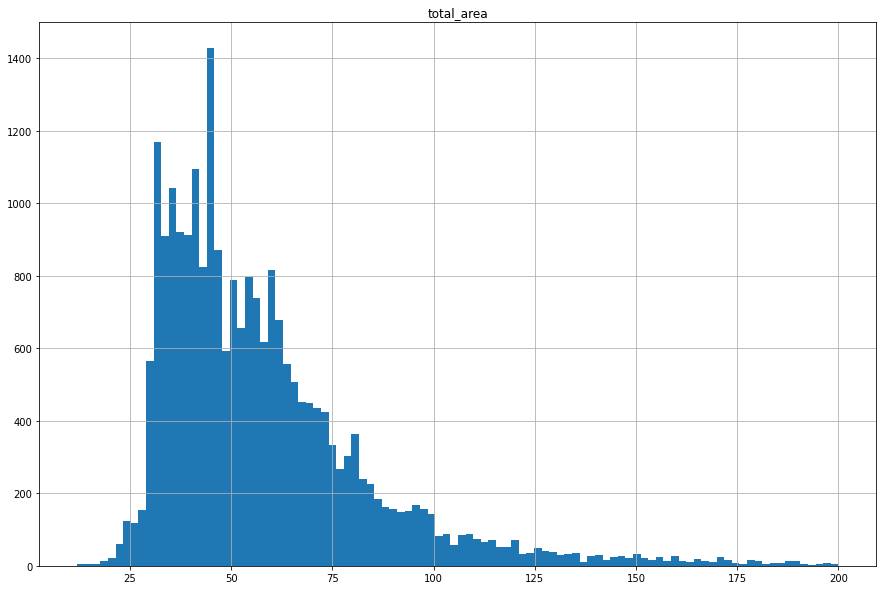

In [132]:
d_total_area = data[data['total_area'] <= 200]
d_total_area.hist('total_area',bins=100, figsize=(15,10))

Рассмотрим значение в районе 50м2 более подробно, для уточнения вывода.

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

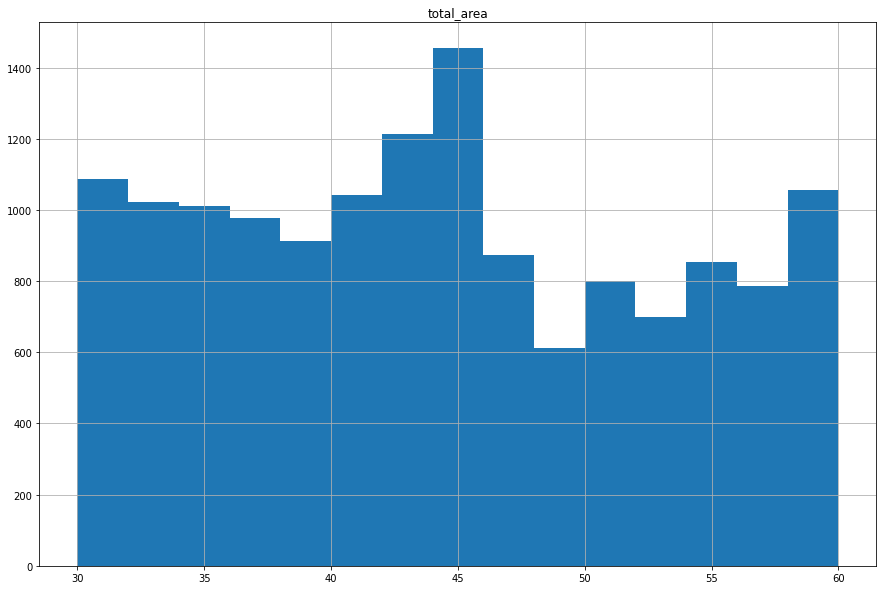

In [133]:
d_total_area.hist('total_area',bins=15, figsize=(15,10), range=(30,60))

<div class="alert alert-info">
<h2> Комментарий студента</h2>
Вывод:
    Большее кол-во квартир имеет площадь в районе 45м2. Большая часть квартир лежит в диаппазоне 26 - 49м2. После 49м2 идет резкий скачек вниз кол-ва квартир и так же после 63м2 и 74м2.

</div>

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

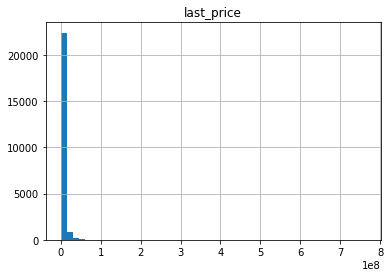

In [134]:
data.hist('last_price',bins=50)

отсечем квартиры более 25 милионов рублей

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

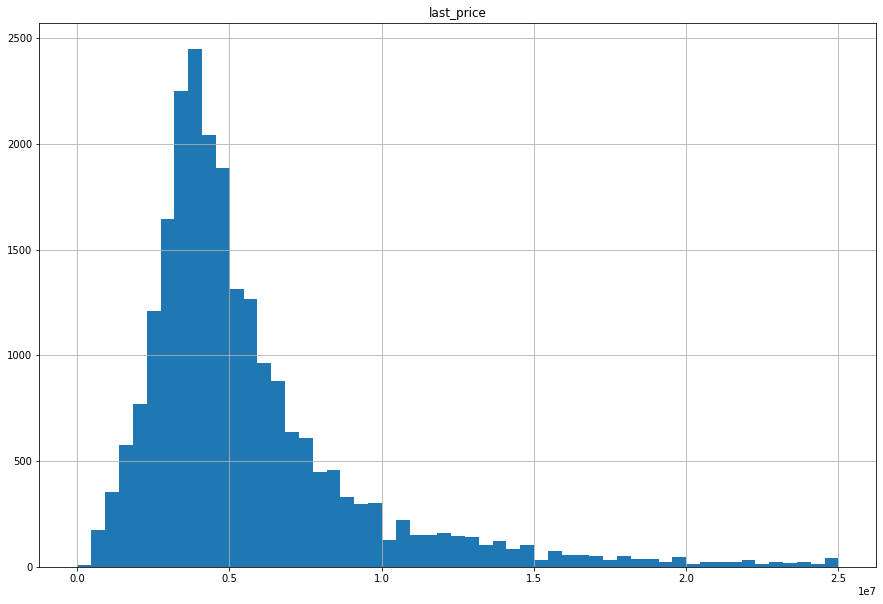

In [135]:
d_last_price = data[data['last_price'] <= 25000000]
d_last_price.hist('last_price',bins=55, figsize=(15,10))

Рассмотрим значение цены за квартиру в даиппазоне от 2 до 7 млн.руб. более подробно, для уточнения вывода.

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

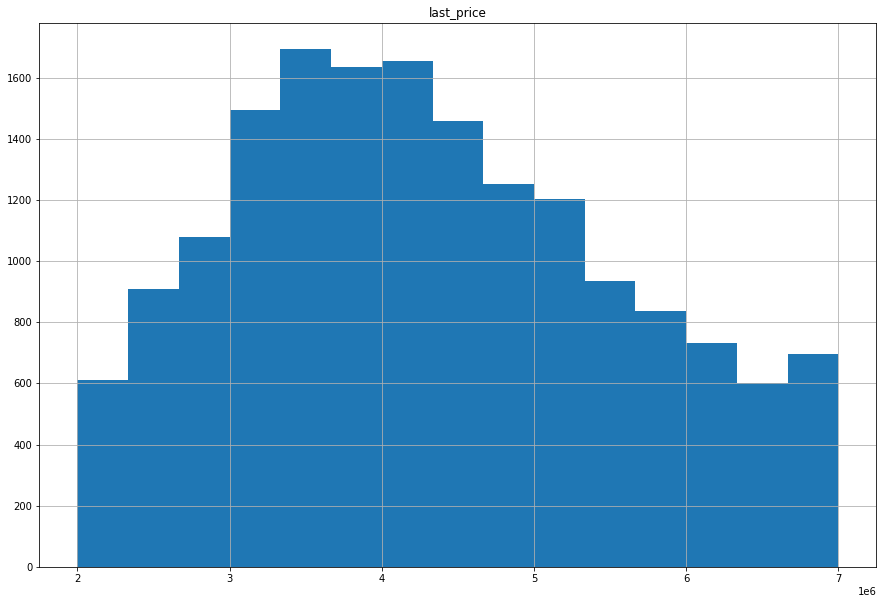

In [136]:
d_last_price.hist('last_price',bins=15, figsize=(15,10), range=(2000000, 7000000))

<div class="alert alert-info">
<h2> Комментарий студента</h2>
Вывод:
    Как видно из графика - большая часть квартир находится в диаппазоне цен - 3млн.руб - 4,6мл.руб.
</div>

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

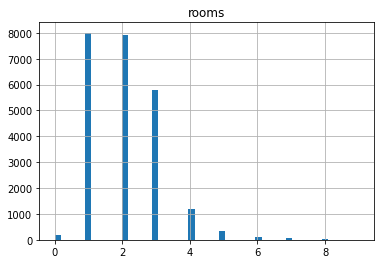

In [137]:
data.hist('rooms',bins=50)

Отсечем квартиры больше 8 комнат

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

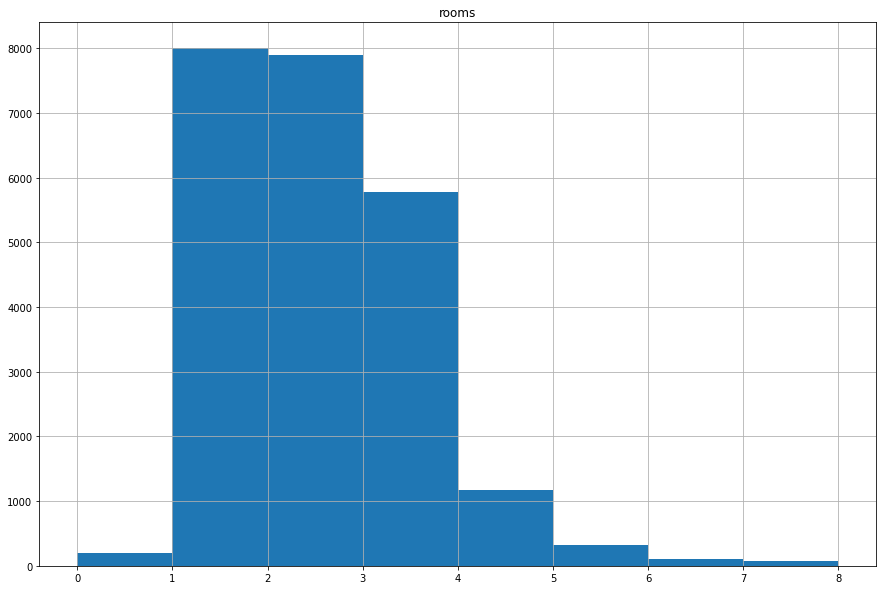

In [138]:
d_last_price = data[data['rooms'] <= 8]
d_last_price.hist('rooms',bins=8,figsize=(15,10))

<div class="alert alert-info">
<h2> Комментарий студента</h2>
Вывод:
    Как видно из графика - большая часть квартир это однокомнатные и двух комнатные. Кол-во квартир с четырьмя комнатами и более существенно меньше.
</div>

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

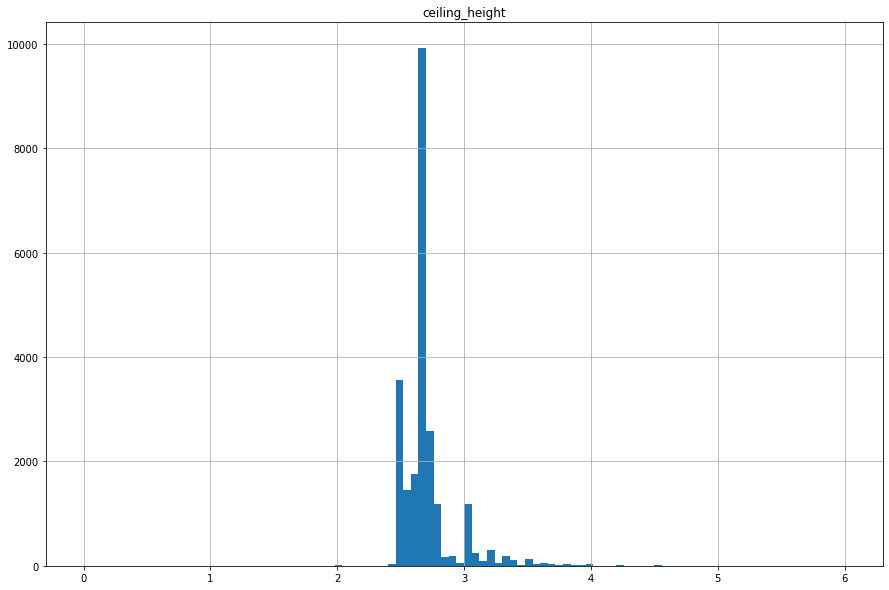

In [139]:
data.hist('ceiling_height',bins=100,figsize=(15,10),range=(0,6))

Посмотри на гистограмму высот потолков в интервале более реальным - 2,4м-3,6м.

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

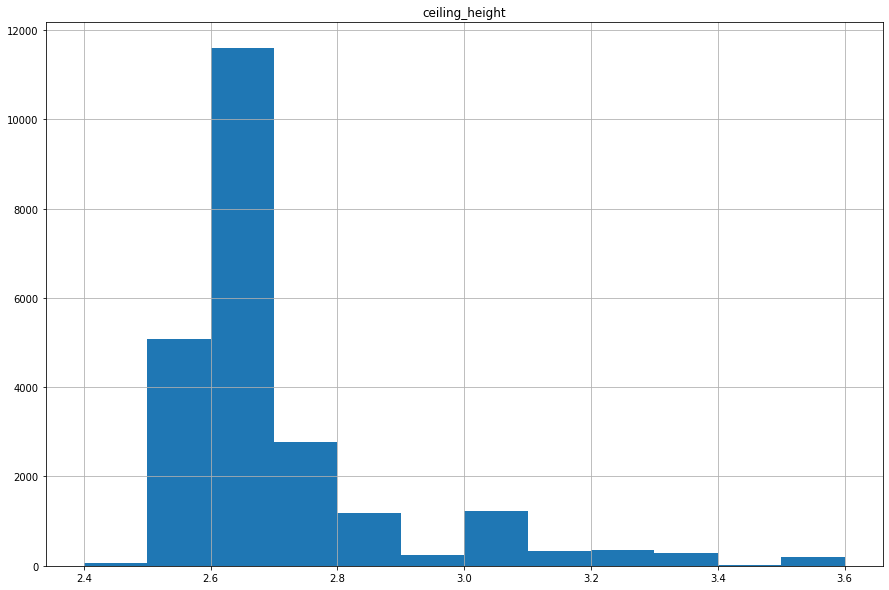

In [140]:
data.hist('ceiling_height',bins=12,figsize=(15,10), range=(2.4,3.6))

<div class="alert alert-info">
<h2> Комментарий студента</h2>
Вывод:
    Как видно из графика - большая часть квартир имеет высоту потолков 2,6м.
</div>

### Построим гистограмму времени продажи квартиры

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

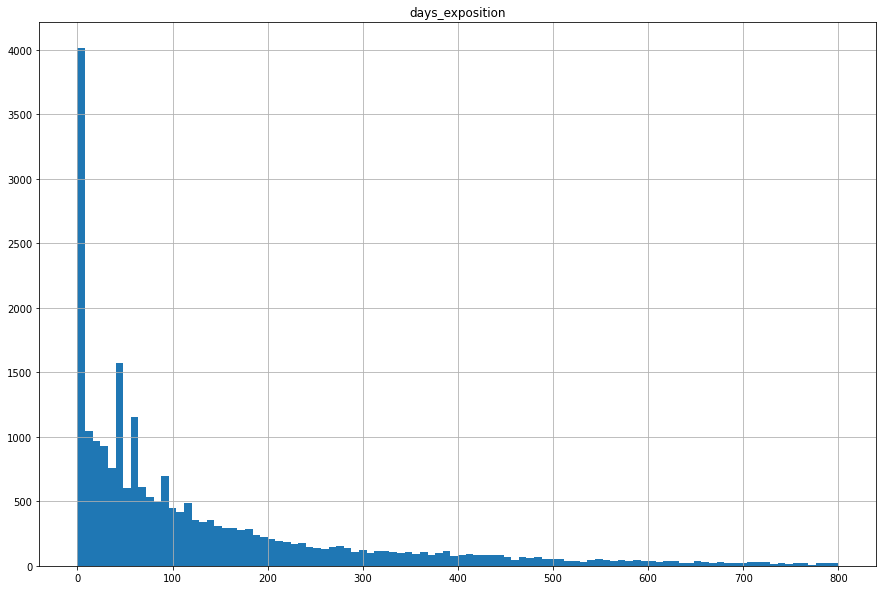

In [141]:
data.hist('days_exposition',bins=100, range=(0,800), figsize=(15,10))

Посмотрим на гистограмму более подробно в интервалле - 0-200.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

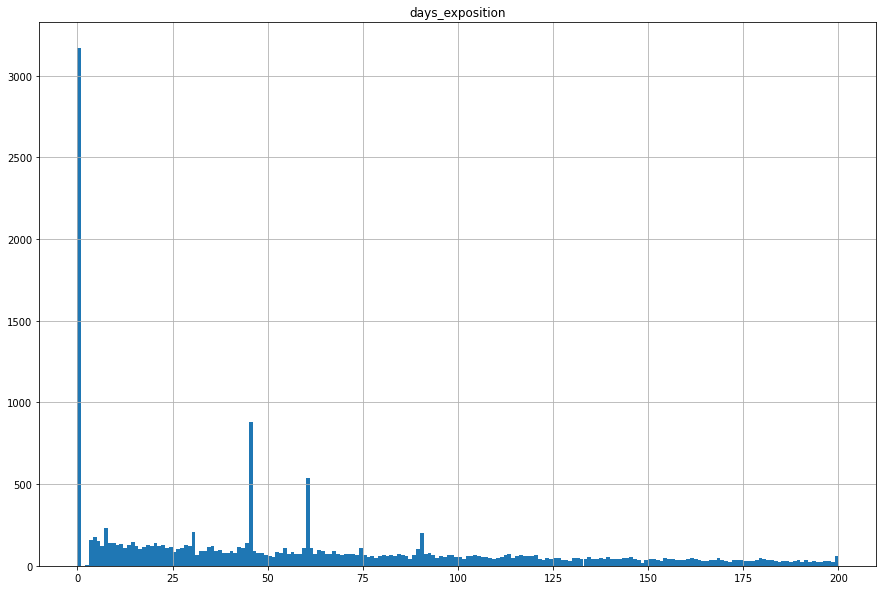

In [142]:
data.hist('days_exposition',bins=200, range=(0,200), figsize=(15,10))

Посмотрим на гистограмму более подробно в интервалле - 0-100.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

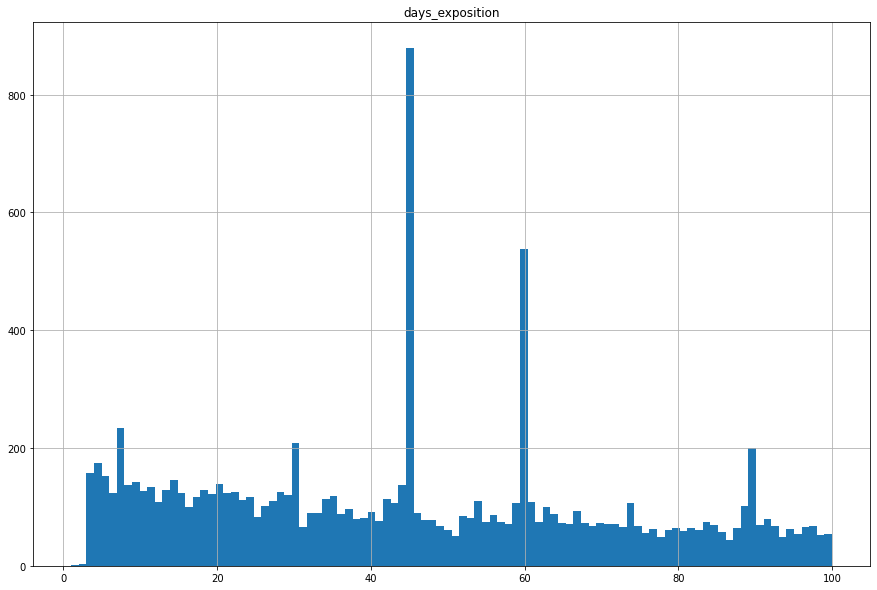

In [143]:
data.hist('days_exposition',bins=100, range=(1,100), figsize=(15,10))

<div class="alert alert-info">
<h2> Комментарий студента</h2>
## Вывод:
    
- Имеем 7 пиков в интервале от 0 до 100.
    
- Первый пик - 0 дней. Скорее всего это баг данных, не может быть что бы квартиры так быстро продавались в таком кол-ве. При определении быстрых и медленных продаж не будем брать во внимание этот пик
    
- Второй пик - 6 дней.
    
- Третий пик - 30 дненй.
    
- Четвертый пик - 45 дней. Самый многочисленный по кол-ву продаж.

- Пятый пик - 60 дней. Второй по значению, про который можно сказать, если квартиру не продали до этого срока, это долгая продажа.

- Шестой пик - 74 дня. Самый малый пик из всех описанных.

- Седьмой пик - 90 дней. Сопоставим по объему продаж со вторым и третьим пиком.

- Восьмой пик - 100 дней. Сопоставим с шестым пиком по объему продаж.
</div>

<div class="alert alert-info">
<h2> Комментарий студента v_2</h2>
В таком случае исключим "0" из графика, т.к. он говорит о том, что объявление еще активно. Получаем 6 пиков.
</div>

In [144]:
print('Медиана days_exposition:', data['days_exposition'].median())

Медиана days_exposition: 73.0


In [145]:
print('Среднее days_exposition:', data['days_exposition'].mean())

Среднее days_exposition: 156.36524581812006


Согласно гистограмме можно сделать вывод, что большая часть квартир продается за 200 дней. Соответственно , квартиры проданные быстрее 200 можно считать быстрыми продажами. А больше 200 дней долгими.

#### Уберем редкие и выбивающиеся значения.

In [146]:
data['days_exposition'].sort_values().unique()

array([   0,    1,    2, ..., 1553, 1572, 1580], dtype=int16)

Можно отсечь значения более 2х лет.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

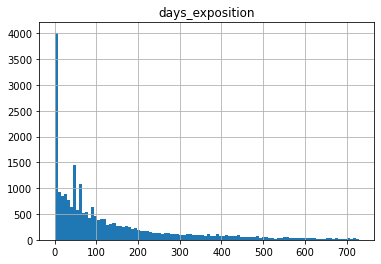

In [147]:
data.hist('days_exposition',bins=100, range=(0,730))

Особенностей нет.

<div class="alert alert-info">
<h2> Комментарий студента_v2</h2>

Данные по площади жилой и кухни касаемо пропусков заменены на медианы. Графики продублируу ниже. Выбросы данных не мешают анализу данных.

Общая площадь на графике фильтруется просто рабочим диапазоном данных - от 0 до 200м2. Графики продублируу ниже. Выбросы данных не мешают анализу данных.
    
Цена так же фильтруется в диапазоне до 20млн.руб. Показал на графиках ниже.
    
Число комнат после очистки данных имеет хороший график. Графики и выводы привел ниже.
    
Высота потолков - графики и выводы привел ниже.

</div>

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

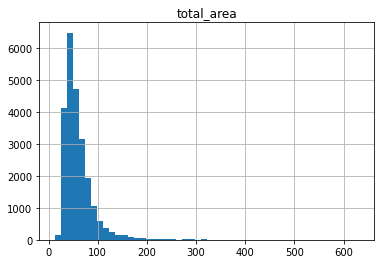

In [148]:
#График общей площади на всем промежутке данных.
data.hist('total_area',bins=50)

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

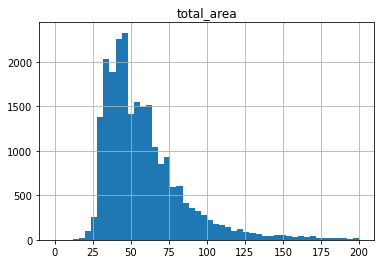

In [149]:
#График общей площади в диапазоне от 0 до 200м2. Т.к. кол-во данных не входящих в этот диапазон не ведико.
data.hist('total_area',bins=50, range=(0,200))

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

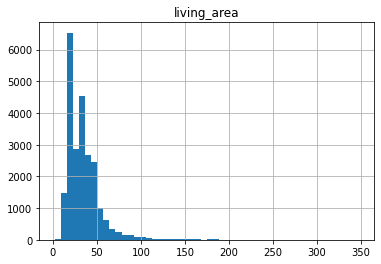

In [150]:
#График жилой площади на всем промежутке данных.
data.hist('living_area',bins=50)

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

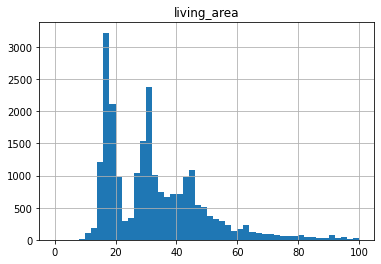

In [151]:
#График жилой площади в жиапазоне от 0 до 100м2. Т.к. кол-во данных не входящих в этот диапазон не ведико.
data.hist('living_area',bins=50, range=(0,100))

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

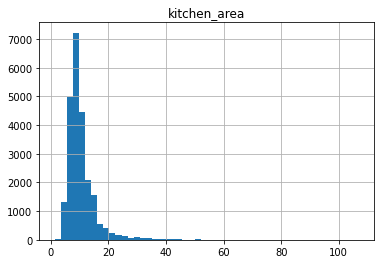

In [152]:
#График площади кухни на всем промежутке данных.
data.hist('kitchen_area',bins=50)

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

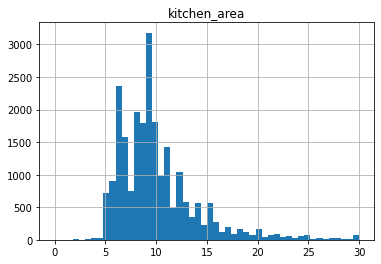

In [153]:
#График площади кухни в диапазоне от 0 до 30м2. Т.к. кол-во данных не входящих в этот диапазон не ведико.
data.hist('kitchen_area',bins=50, range=(0,30))

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

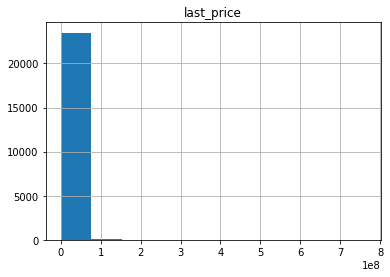

In [154]:
#График цен на всем промежутке данных.
data.hist('last_price',bins=10)

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

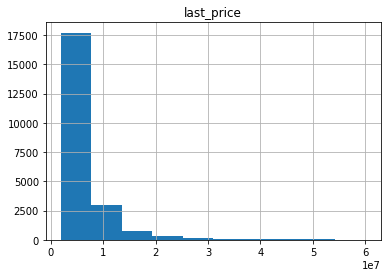

In [155]:
#График цен на всем промежутке данных.
data.hist('last_price',bins=10, range=(2000000, 60000000)) #Видно что основной объем данных находится в иинтервалле от 0 до 32 000 000.

<AxesSubplot:xlabel='rooms'>

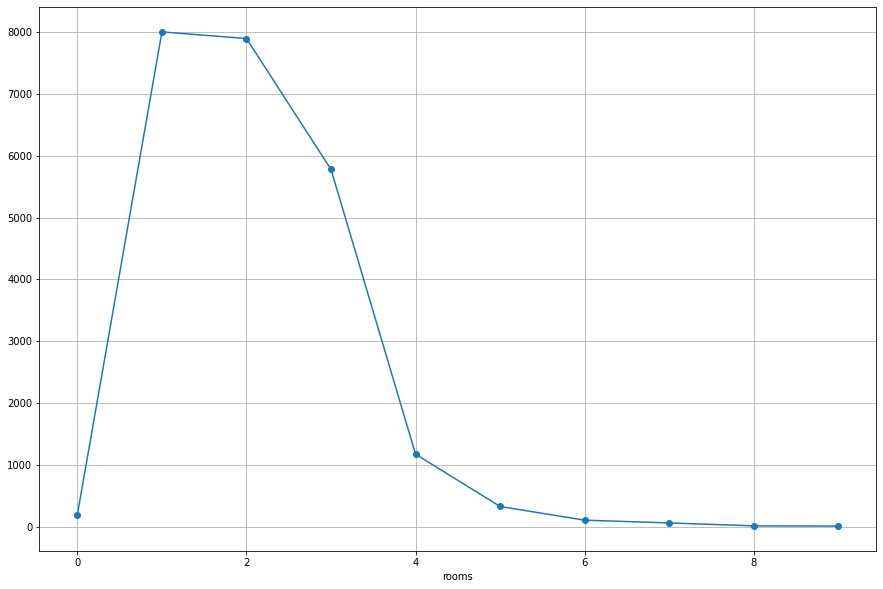

In [156]:
#График цен на всем промежутке данных. Заменил гистограмму на плот, т.к. мне кажется он смотрится нагляднее.
data.value_counts('rooms', sort=False).plot(figsize=(15,10), style='o-', grid=True)

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

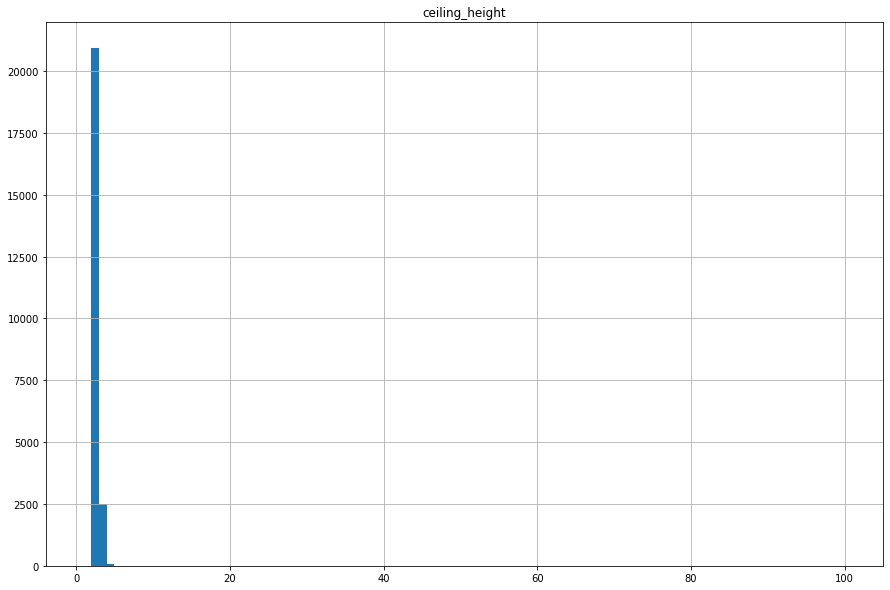

In [157]:
data.hist('ceiling_height',bins=100,figsize=(15,10))

Рассмотрим этот график более подробно на интервале от 2 до 5м.

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

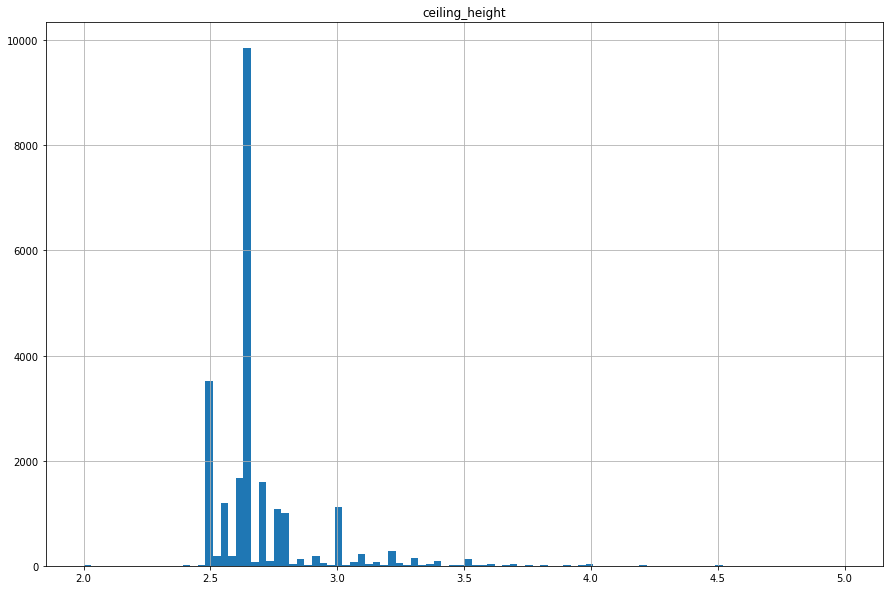

In [158]:
data.hist('ceiling_height',bins=100,figsize=(15,10),range=(2,5))

Можно сделать вывод что реальные значения лежат в интервале от 2,4 до 3,6м, остальные данные это выбросы. Отсечем выбросы, изменив интервал построения графика.

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

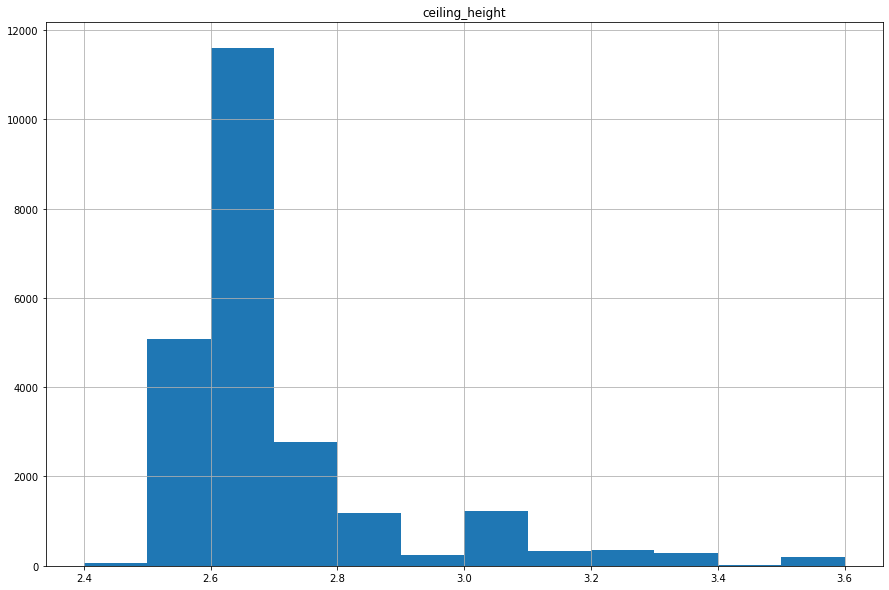

In [159]:
data.hist('ceiling_height',bins=12,figsize=(15,10),range=(2.4,3.6))

<div class="alert alert-info">
<h2> Комментарий студента_v2</h2>
Далее ответы на замечания №2 заканчиваются.
</div>

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

<AxesSubplot:xlabel='total_area'>

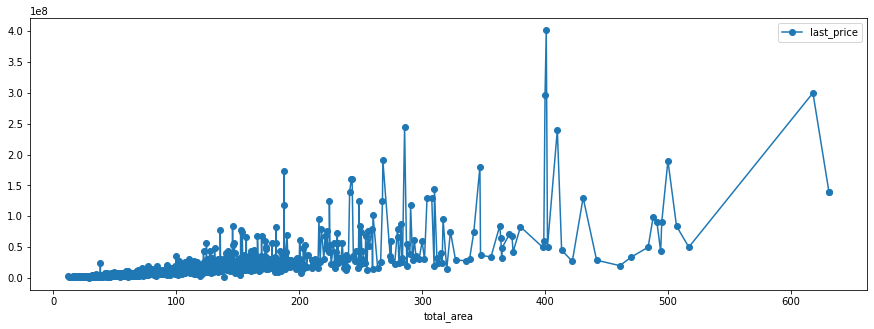

In [160]:
data.pivot_table(index='total_area', values='last_price').plot(figsize=(15,5), style='o-')

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

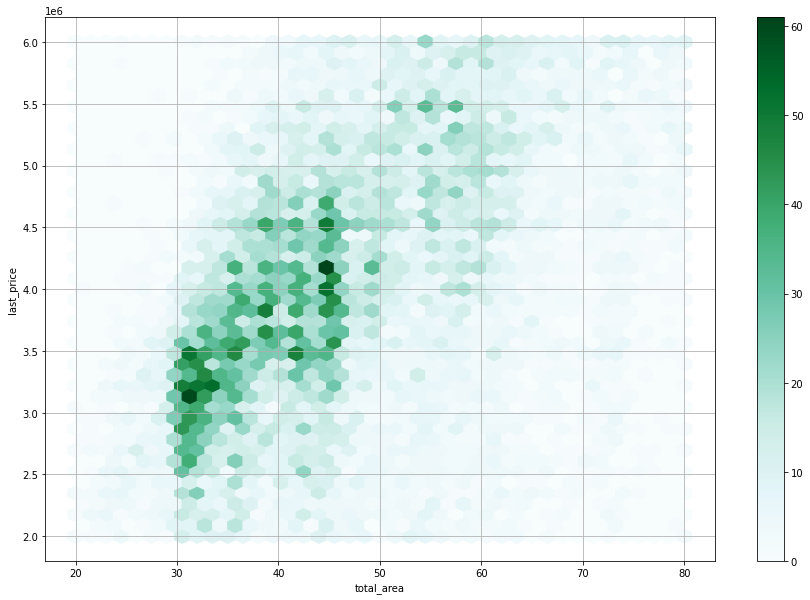

In [161]:
data.plot(x='total_area', y='last_price', kind='hexbin', gridsize=40, figsize=(15, 10), sharex=False, grid=True, extent=[20,80,2000000,6000000])

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

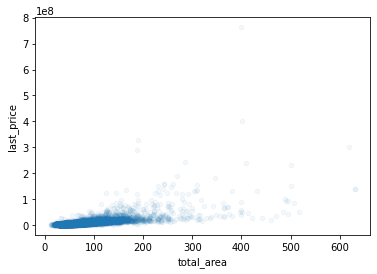

In [162]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.05) 

In [163]:
print('Коэффициент корреляции равен:',data['total_area'].corr(data['last_price']),'для общей площади и ццены.')

Коэффициент корреляции равен: 0.6436845285167898 для общей площади и ццены.


<div class="alert alert-info">
<h2> Комментарий студента</h2>
Вывод по графику - с увеличением площади квартиры растет и цена. Согласно полученному коэф-ту корреляции можно сказать , что небольшая связь между этими хар-ми существует.
</div>

<AxesSubplot:xlabel='rooms'>

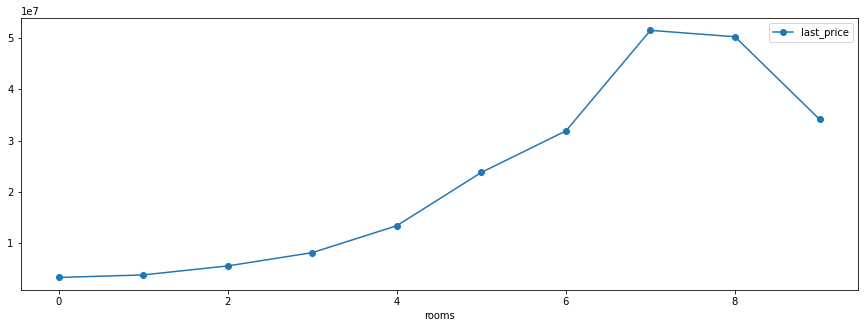

In [164]:
data.pivot_table(index='rooms', values='last_price').plot(figsize=(15,5), style='o-')

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

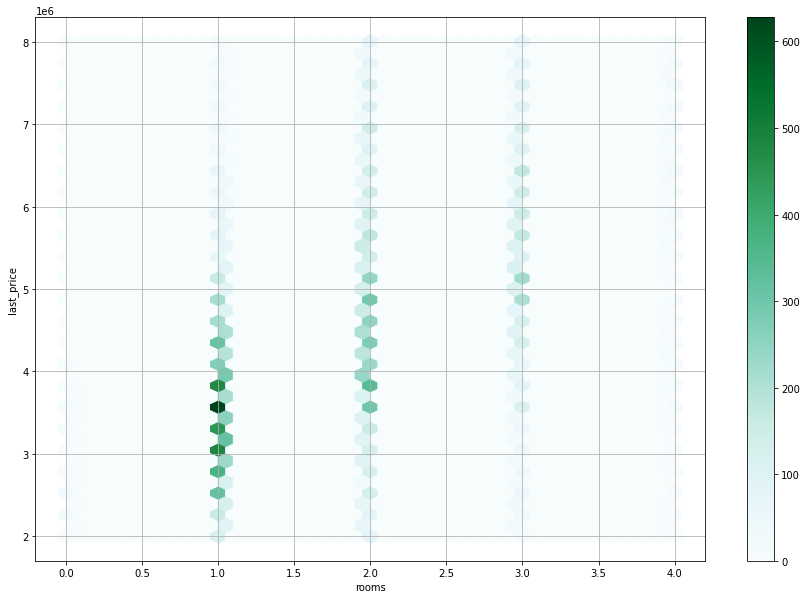

In [165]:
data.plot(x='rooms', y='last_price', kind='hexbin', gridsize=40, figsize=(15, 10), sharex=False, grid=True, extent=[0,4,2000000,8000000])

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

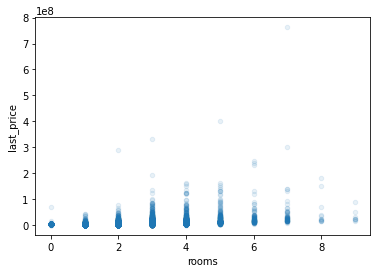

In [166]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.1) 

In [167]:
print('Коэффициент корреляции равен:',data['rooms'].corr(data['last_price']),'для кол-ва комнат и цены.')

Коэффициент корреляции равен: 0.3588046957113787 для кол-ва комнат и цены.


<div class="alert alert-info">
<h2> Комментарий студента</h2>
Вывод по графику - с увеличением кол-ва комнат растет и цена. Согласно полученному коэф-ту корреляции можно сказать , что звязи между этими хар-ми практически нет.
</div>

<AxesSubplot:xlabel='city_center_nearest'>

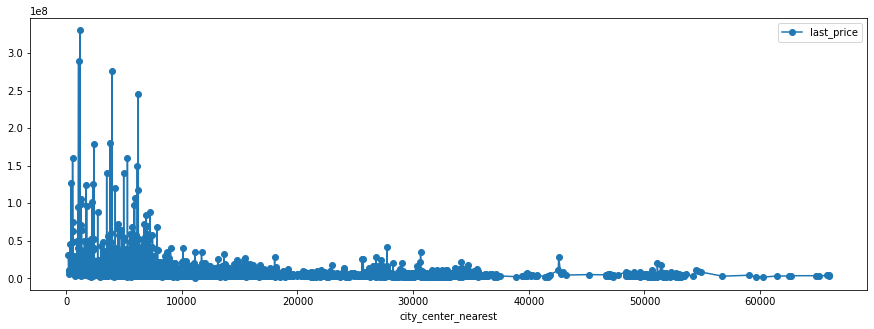

In [168]:
data[data['city_center_nearest'] > 0].pivot_table(index='city_center_nearest', values='last_price').plot(figsize=(15,5), style='o-')

<AxesSubplot:xlabel='city_center_nearest', ylabel='last_price'>

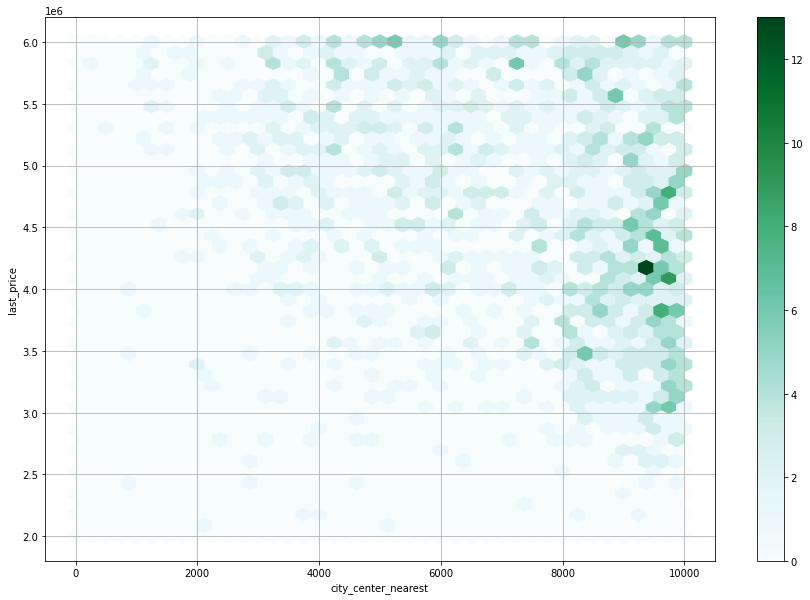

In [169]:
data[data['city_center_nearest'] > 0].plot(x='city_center_nearest', y='last_price', kind='hexbin', gridsize=40, figsize=(15, 10), sharex=False, grid=True, extent=[0,10000,2000000,6000000])

<AxesSubplot:xlabel='city_center_nearest', ylabel='last_price'>

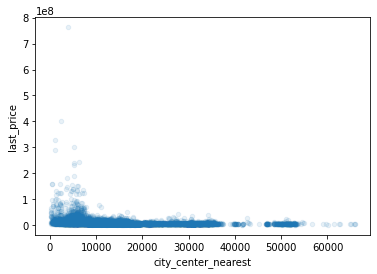

In [170]:
data[data['city_center_nearest'] > 0].plot(x='city_center_nearest', y='last_price', kind='scatter', alpha=0.1) 

In [171]:
print('Коэффициент корреляции равен:',data[data['city_center_nearest'] > 0]['city_center_nearest'].corr(data['last_price']),'для близости к центру и цены.')

Коэффициент корреляции равен: -0.21098235003800214 для близости к центру и цены.


<div class="alert alert-info">
<h2> Комментарий студента</h2>
Вывод по графику - удаленность от центра города оказывает влияние на стоимость квартиры. Чем ближе квартира к центру, тем дороже. Согласно полученному коэф-ту зависимость может присутствовать, но она очень мала.
</div>

<AxesSubplot:xlabel='floor_category'>

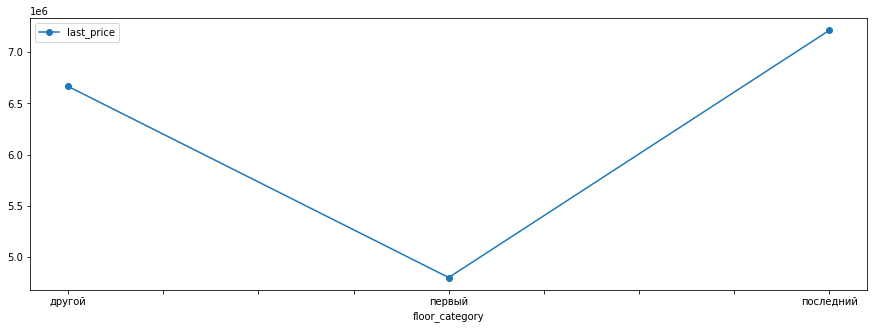

In [172]:
data.pivot_table(index='floor_category', values='last_price').plot(figsize=(15,5), style='o-')

<AxesSubplot:xlabel='floor_category', ylabel='last_price'>

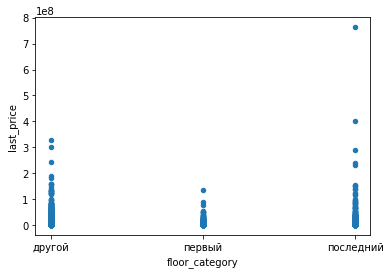

In [173]:
data.plot(x='floor_category', y='last_price', kind='scatter', alpha=1) 

<div class="alert alert-info">
<h2> Комментарий студента</h2>
Вывод по графику - Последний этаж оказался дороже, первый этаж ожидаемо дешевле всех.
</div>

<AxesSubplot:xlabel='week_day'>

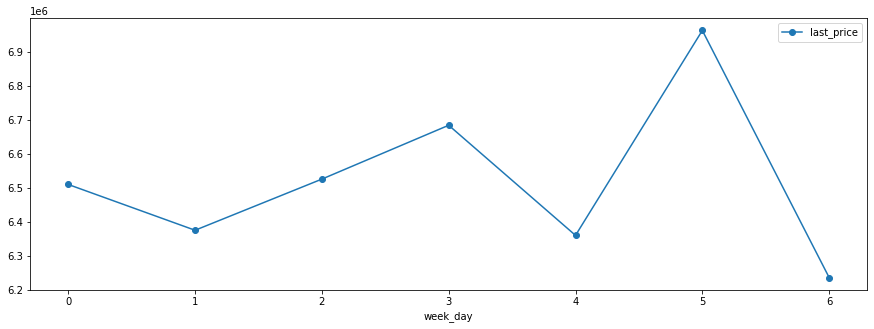

In [174]:
data.pivot_table(index='week_day', values='last_price').plot(figsize=(15,5), style='o-')

<AxesSubplot:xlabel='week_day', ylabel='last_price'>

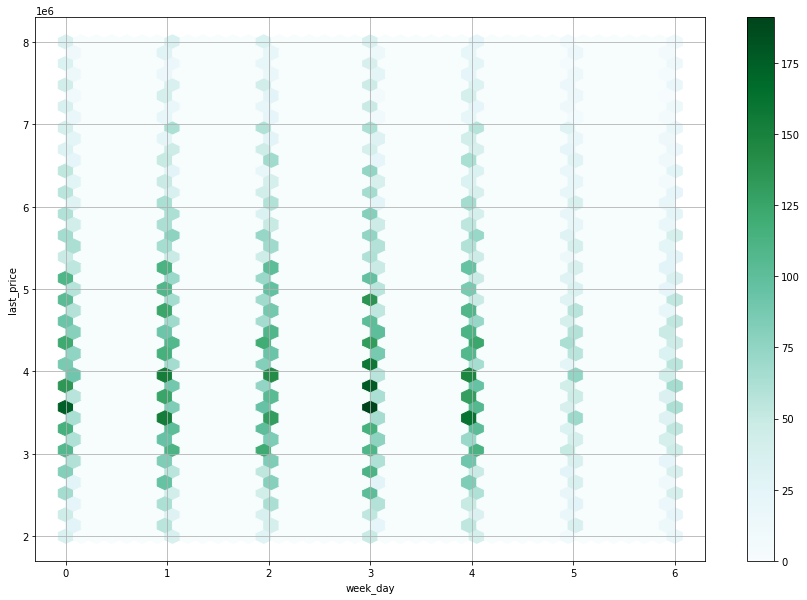

In [175]:
data.plot(x='week_day', y='last_price', kind='hexbin', gridsize=40, figsize=(15, 10), sharex=False, grid=True, extent=[0,6,2000000,8000000])

<AxesSubplot:xlabel='week_day', ylabel='last_price'>

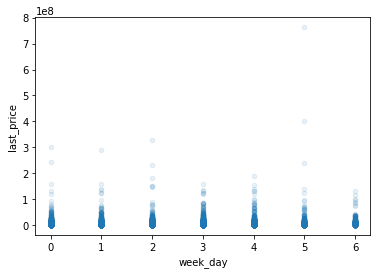

In [176]:
data.plot(x='week_day', y='last_price', kind='scatter', alpha=0.1) 

In [177]:
print('Коэффициент корреляции равен:',data['week_day'].corr(data['last_price']),'для дня дня недели и цены.')

Коэффициент корреляции равен: 0.0018991608051210508 для дня дня недели и цены.


<div class="alert alert-info">
<h2> Комментарий студента</h2>
Коэф-нт корреляции однозначно говорит, что нечего тут искать, нет зависимости.
</div>

<AxesSubplot:xlabel='month'>

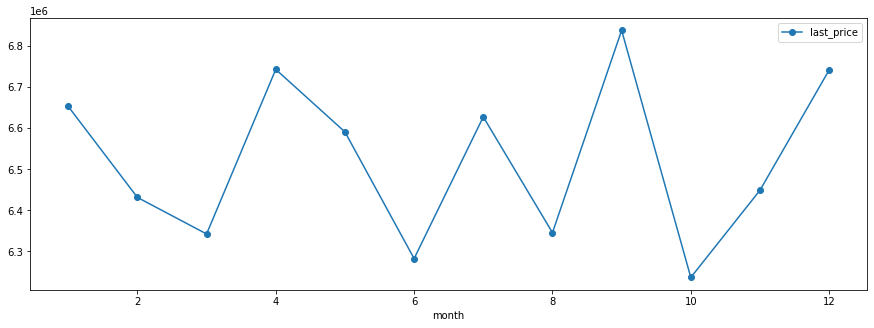

In [178]:
data.pivot_table(index='month', values='last_price').plot(figsize=(15,5), style='o-')

<AxesSubplot:xlabel='month', ylabel='last_price'>

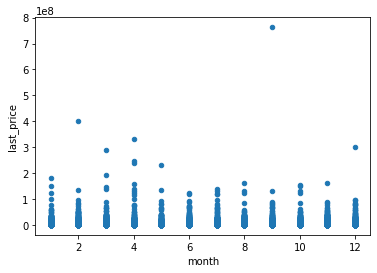

In [179]:
data.plot(x='month', y='last_price', kind='scatter', alpha=1) 

<AxesSubplot:xlabel='month', ylabel='last_price'>

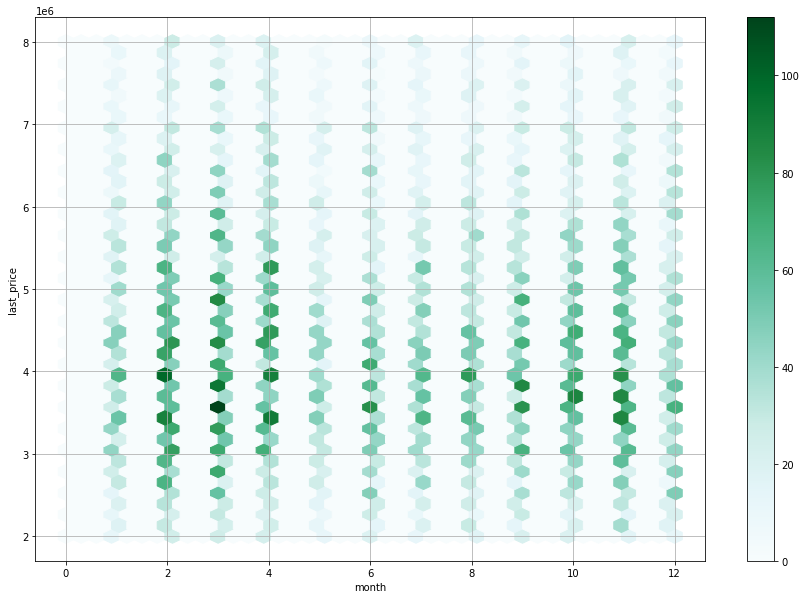

In [180]:
data.plot(x='month', y='last_price', kind='hexbin', gridsize=40, figsize=(15, 10), sharex=False, grid=True, extent=[0,12,2000000,8000000])

In [181]:
print('Коэффициент корреляции равен:',data['month'].corr(data['last_price']),'для месяца и цены.')

Коэффициент корреляции равен: 0.0007536271681745331 для месяца и цены.


<div class="alert alert-info">
<h2> Комментарий студента</h2>
Коэф-нт корреляции однозначно говорит, что нечего тут искать, нет зависимости. А вот по графику можно сказать что в январе и июне почти нет объевлений.
</div>

<AxesSubplot:xlabel='year'>

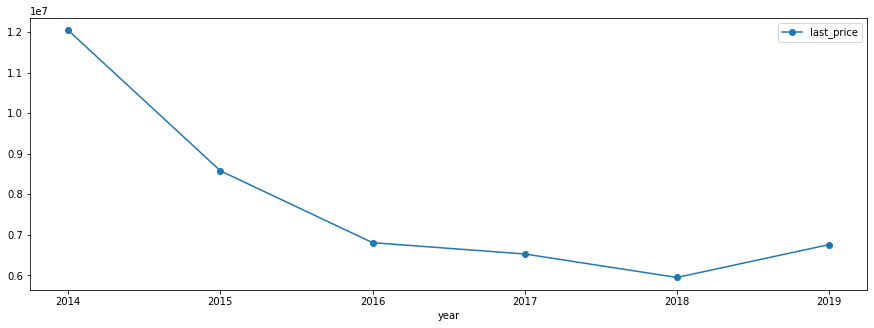

In [182]:
data.pivot_table(index='year', values='last_price').plot(figsize=(15,5), style='o-')

<AxesSubplot:xlabel='year', ylabel='last_price'>

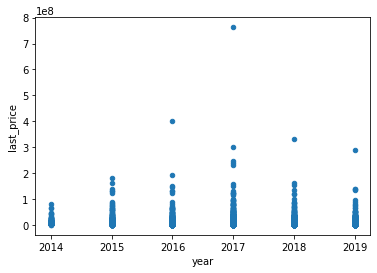

In [183]:
data.plot(x='year', y='last_price', kind='scatter', alpha=1) 

<AxesSubplot:xlabel='year', ylabel='last_price'>

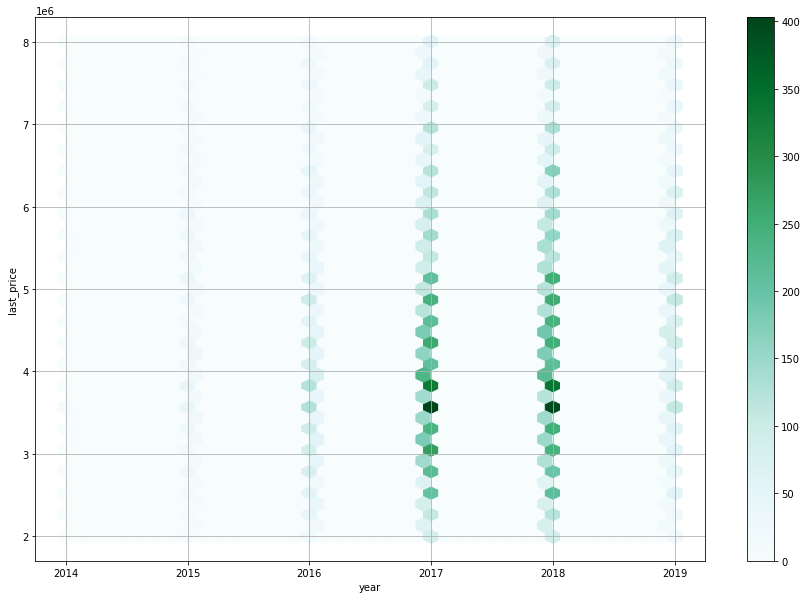

In [184]:
data.plot(x='year', y='last_price', kind='hexbin', gridsize=40, figsize=(15, 10), sharex=False, grid=True, extent=[2014,2019,2000000,8000000])

In [185]:
print('Коэффициент корреляции равен:',data['month'].corr(data['last_price']),'для года и цены.')

Коэффициент корреляции равен: 0.0007536271681745331 для года и цены.


<div class="alert alert-info">
<h2> Комментарий студента</h2>
Коэф-нт корреляции однозначно говорит, что нечего тут искать, нет зависимости. А вот по графику можно сказать 2017 и 2018 в лидерах по кол-ву дорогих квартир.
</div>

#### Найдем десятку самых популярных населенных пунктов с объявлениями о продаже квартир.

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23554 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23554 non-null  int64         
 1   last_price            23554 non-null  float64       
 2   total_area            23554 non-null  float64       
 3   first_day_exposition  23554 non-null  datetime64[ns]
 4   rooms                 23554 non-null  int64         
 5   ceiling_height        23554 non-null  float64       
 6   floors_total          23554 non-null  int8          
 7   living_area           23554 non-null  float64       
 8   floor                 23554 non-null  int64         
 9   is_apartment          23554 non-null  bool          
 10  studio                23554 non-null  bool          
 11  open_plan             23554 non-null  bool          
 12  kitchen_area          23554 non-null  float64       
 13  balcony         

In [187]:
#Соберем список из 10 городов с наибольшим кол-вом объявлений
top_ten_city_counts = data['locality_name_copy'].value_counts()[0:10]
print(top_ten_city_counts)
print('')
print('Длина списка top_ten_city:',len(top_ten_city_counts))

Санкт-Петербург      15640
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name_copy, dtype: int64

Длина списка top_ten_city: 10


In [188]:
#Вытащим названия городов из индексов в отдельный список для простоты работы
top_ten_city = []
for index in range(0,10):
    top_ten_city.append(top_ten_city_counts.index[index])

top_ten_city    

['Санкт-Петербург',
 'посёлок Мурино',
 'посёлок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'посёлок Парголово',
 'Гатчина',
 'деревня Кудрово',
 'Выборг']

In [189]:
#Соберем датафрейм с городами из нашего топ списка
data_top_ten_city = data[data['locality_name_copy'].isin(top_ten_city)]

In [190]:
data_top_ten_city.pivot_table(index='locality_name_copy', values='sq_metr_price', aggfunc='mean').sort_values(by='sq_metr_price', ascending=False)

,sq_metr_price
locality_name_copy,
Санкт-Петербург,114852.899827
Пушкин,103125.818157
деревня Кудрово,92473.546488
посёлок Парголово,90175.915291
посёлок Мурино,85673.259231
посёлок Шушары,78551.343964
Колпино,75424.581953
Гатчина,68746.147231
Всеволожск,68654.475628


Вывод: самая дорогая недвижимость в Санкт-Петербурге, самая дешевая - в Выборге.

#### Определение зависимости цены за квартиру от удаленности от центра.

Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23554 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23554 non-null  int64         
 1   last_price            23554 non-null  float64       
 2   total_area            23554 non-null  float64       
 3   first_day_exposition  23554 non-null  datetime64[ns]
 4   rooms                 23554 non-null  int64         
 5   ceiling_height        23554 non-null  float64       
 6   floors_total          23554 non-null  int8          
 7   living_area           23554 non-null  float64       
 8   floor                 23554 non-null  int64         
 9   is_apartment          23554 non-null  bool          
 10  studio                23554 non-null  bool          
 11  open_plan             23554 non-null  bool          
 12  kitchen_area          23554 non-null  float64       
 13  balcony         

In [192]:
data['city_center_nearest_copy'] = round(data['city_center_nearest'] / 1000, 0)

In [193]:
#Округлим значения до целого значения путем перевода в тип данных - целочисленный.
data['city_center_nearest_copy'] = pd.to_numeric(data['city_center_nearest_copy'], errors='coerce',downcast='integer')
data['city_center_nearest_copy']

0        16
1        19
2        14
3         7
4         8
         ..
23694     4
23695     0
23696     0
23697    10
23698     0
Name: city_center_nearest_copy, Length: 23554, dtype: int8

In [194]:
data_city_centr_spb = data[data['locality_name_copy'] == 'Санкт-Петербург']
df = data_city_centr_spb.pivot_table(index='city_center_nearest_copy', values='sq_metr_price', aggfunc='mean').sort_values(by='city_center_nearest_copy')
#df.columns
df = df.reset_index()
df

,city_center_nearest_copy,sq_metr_price
0,0,184310.937931
1,1,177042.004712
2,2,157981.901618
3,3,121583.465418
4,4,133392.083090
5,5,140565.289912
6,6,151012.194175
7,7,156176.880714
8,8,125169.600845
9,9,113159.373942


<AxesSubplot:xlabel='city_center_nearest_copy'>

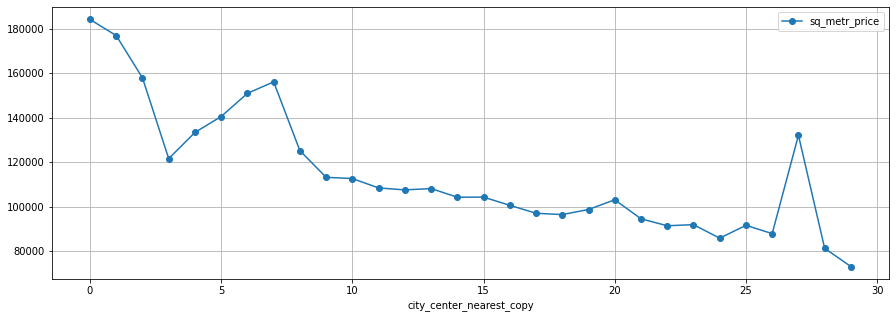

In [195]:
df.pivot_table(index='city_center_nearest_copy', values='sq_metr_price').plot(figsize=(15,5), style='o-', grid=True)

Двумя разными способами вывел результат, график более нагряден для изучения результатов. Как итог 7км это радиус в котором находятся квартиры с высокой стоимость. Далее от центра цена резко падает.

#### Изучим квартиры в центре Санкт-Петербурга более подробно.

In [196]:
df_centr_flat = data[(data['city_center_nearest_copy'] <= 7) & (data['locality_name_copy'] == 'Санкт-Петербург')]
df_centr_flat

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name_copy,locality_name_lower,sq_metr_price,week_day,month,year,floor_category,living_part,kitchen_part,city_center_nearest_copy
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.0,9,False,...,Санкт-Петербург,санкт-петербург,408176.1,4,7,2015,другой,0.28,0.06,7
24,8,6500000.0,97.20,2015-10-31,2,2.65,3,46.5,1,False,...,Санкт-Петербург,санкт-петербург,66872.4,5,10,2015,первый,0.48,0.20,2
35,6,15500000.0,149.00,2017-06-26,5,2.65,5,104.0,4,False,...,Санкт-Петербург,санкт-петербург,104026.8,0,6,2017,другой,0.70,0.11,4
51,7,45000000.0,161.00,2017-10-17,3,3.20,8,38.0,4,False,...,Санкт-Петербург,санкт-петербург,279503.1,1,10,2017,другой,0.24,0.31,7
52,20,11795000.0,136.00,2017-09-22,6,3.00,2,94.0,2,False,...,Санкт-Петербург,санкт-петербург,86727.9,4,9,2017,последний,0.69,0.08,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000.0,47.00,2016-05-20,1,2.65,6,18.2,1,False,...,Санкт-Петербург,санкт-петербург,90425.5,4,5,2016,первый,0.39,0.31,5
23681,13,5250000.0,43.00,2018-05-11,2,2.50,5,29.0,2,False,...,Санкт-Петербург,санкт-петербург,122093.0,4,5,2018,другой,0.67,0.14,7
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5,31.0,2,False,...,Санкт-Петербург,санкт-петербург,105769.2,3,7,2018,другой,0.60,0.12,6
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,Санкт-Петербург,санкт-петербург,129904.0,3,10,2016,другой,0.55,0.15,4


array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

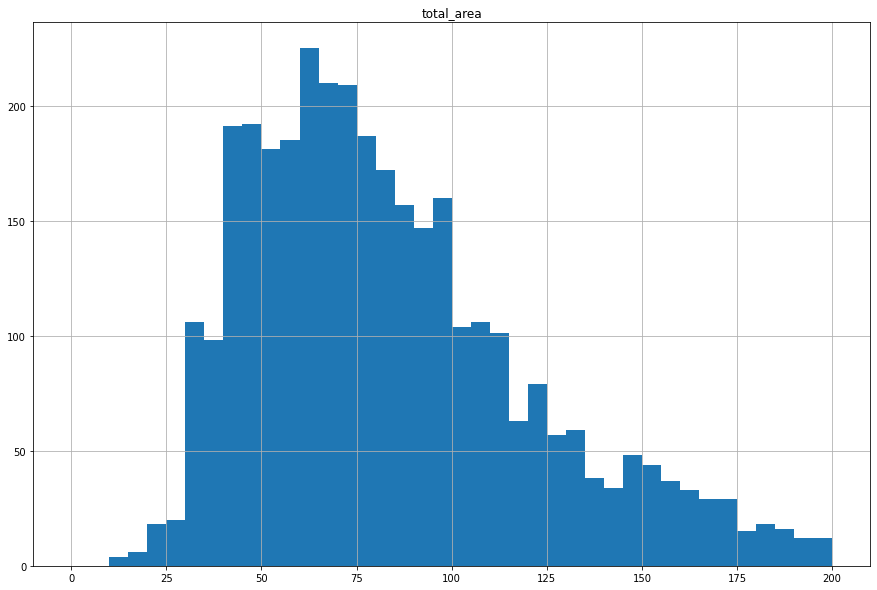

In [197]:
df_centr_flat.hist('total_area',bins=40, range=(0,200), figsize=(15,10))

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

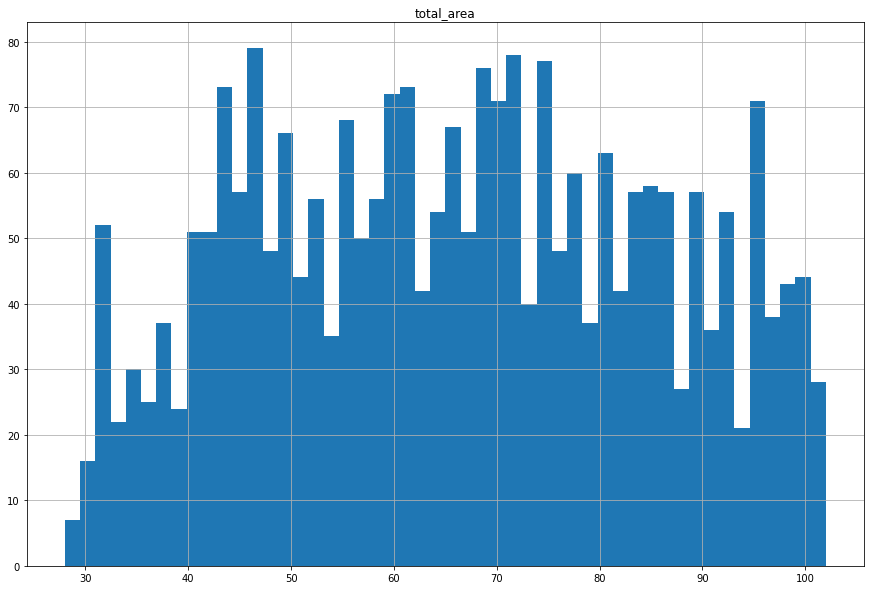

In [198]:
df_centr_flat.hist('total_area',bins=50, range=(28,102), figsize=(15,10))

<div class="alert alert-info">
<h2> Комментарий студента</h2>
Квартир с общей площадю в районе 60м2 больше всего в центре. Большее кол-во квартир находится в иртервале от 40м2 до 100м2.
</div>

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

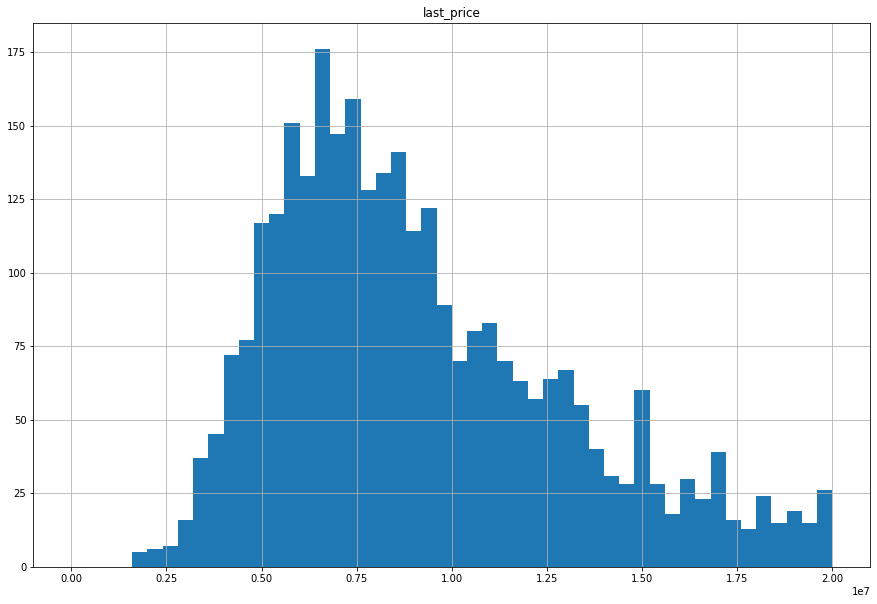

In [199]:
df_centr_flat.hist('last_price',bins=50, range=(0,20000000), figsize=(15,10))

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

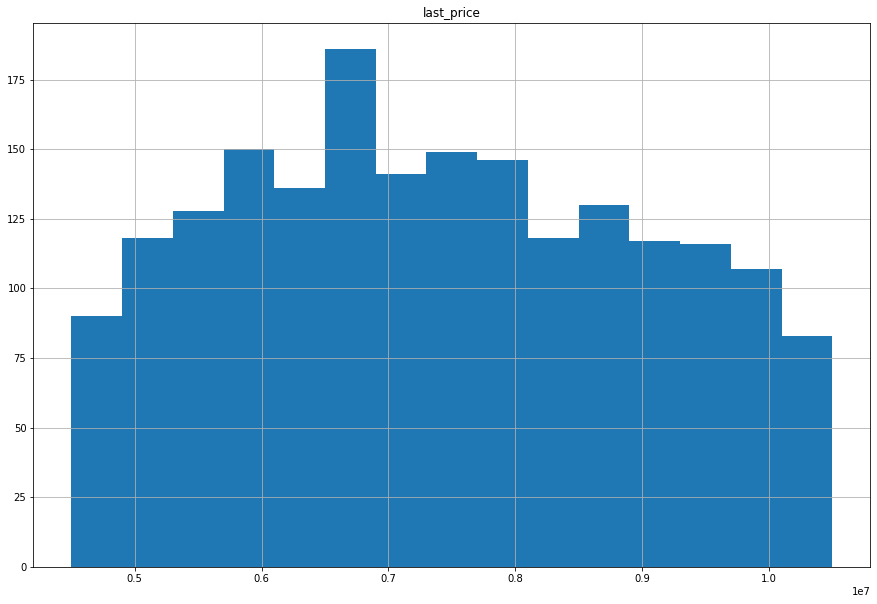

In [200]:
df_centr_flat.hist('last_price',bins=15, range=(4500000,10500000), figsize=(15,10))

<div class="alert alert-info">
<h2> Комментарий студента</h2>
Квартир со стоимостью в интервалле 4,9млн.руб. - 9млн.руб. больше всего в центре. Большее кол-во квартир стоимость находится в районе 7млн.руб.
</div>

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

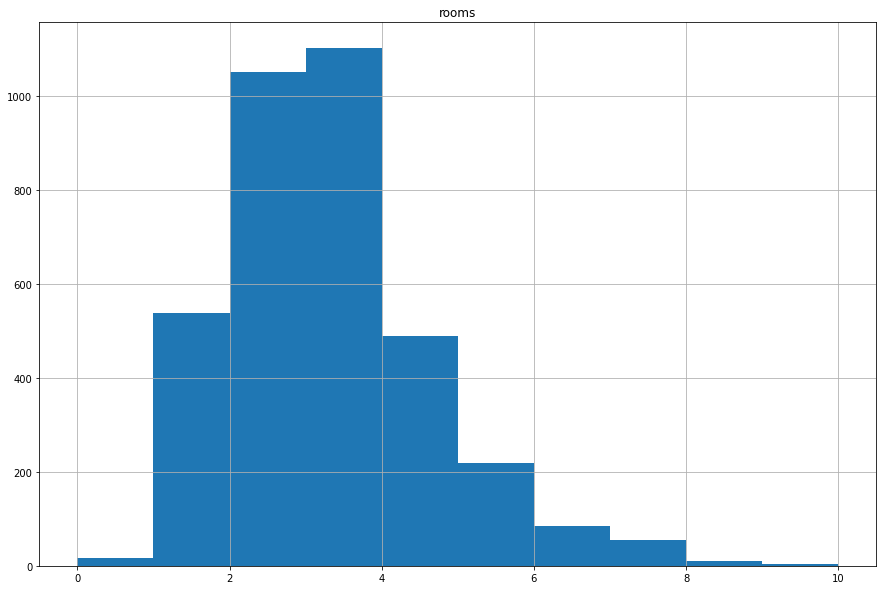

In [201]:
df_centr_flat.hist('rooms',bins=10, range=(0,10), figsize=(15,10))

<div class="alert alert-info">
<h2> Комментарий студента</h2>
Двух и трех комнатных квартир больше всего в центре. 
</div>

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

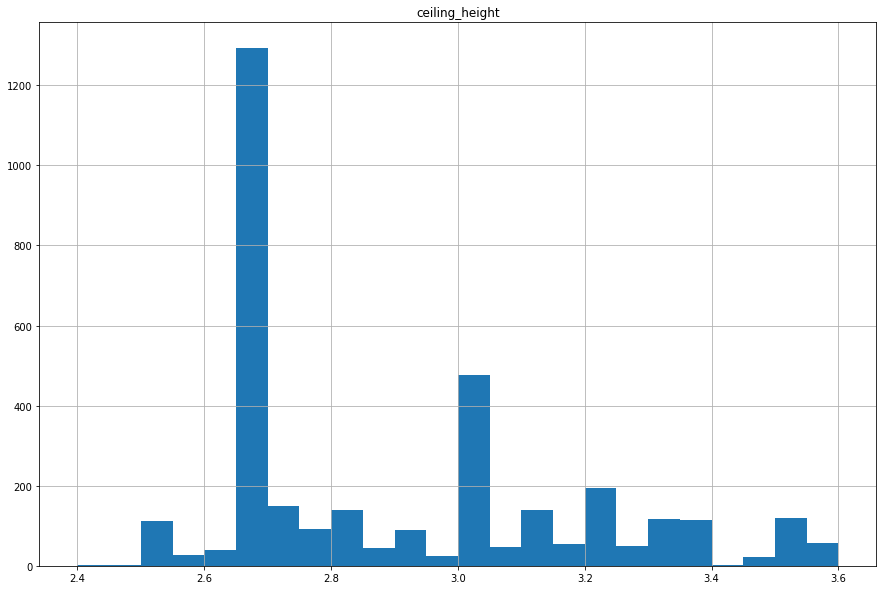

In [202]:
df_centr_flat.hist('ceiling_height',bins=24, range=(2.4,3.6), figsize=(15,10))

<div class="alert alert-info">
<h2> Комментарий студента</h2>
Самая распространенная высота потолков в квартирах в центра - 2,65м 
</div>

<AxesSubplot:xlabel='rooms'>

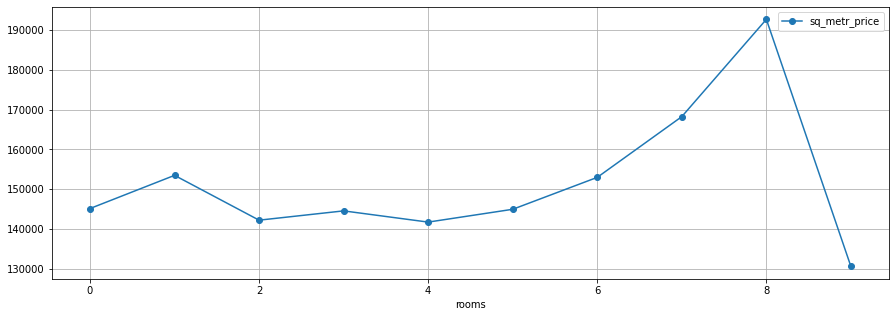

In [203]:
df_centr_flat.pivot_table(index='rooms', values='sq_metr_price').plot(figsize=(15,5), style='o-', grid=True)

<div class="alert alert-info">
<h2> Комментарий студента</h2>
По всей видимости квартиры от 5 до 8 комнат самые популярные в центре города, отсюда и такая цена на них. Все что больше 8 комнат это видимо очень большие квартиры по площади и по этому цены на них за квадрат меньше, так как видимо спрос меньше.
</div>

<AxesSubplot:xlabel='floor_category'>

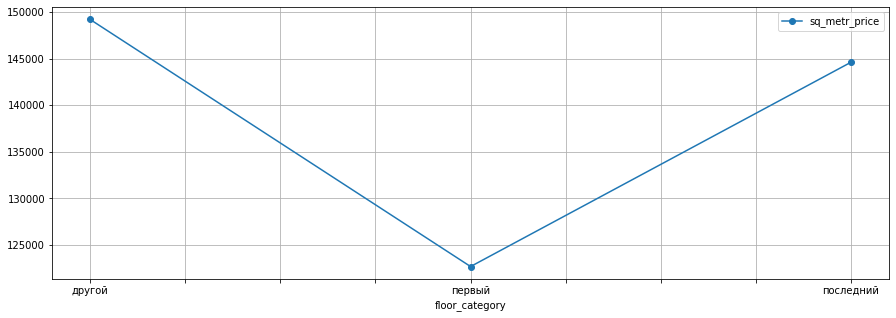

In [204]:
df_centr_flat.pivot_table(index='floor_category', values='sq_metr_price').plot(figsize=(15,5), style='o-', grid=True)

<div class="alert alert-info">
<h2> Комментарий студента</h2>
Первый этаж он всегда пользуется меньшим спросом
</div>

<div class="alert alert-info">
<h2> Комментарий студента_v2</h2>
Так же отсек в данных значения при которых удаленность от центра павна "0".
</div>

<AxesSubplot:xlabel='city_center_nearest_copy'>

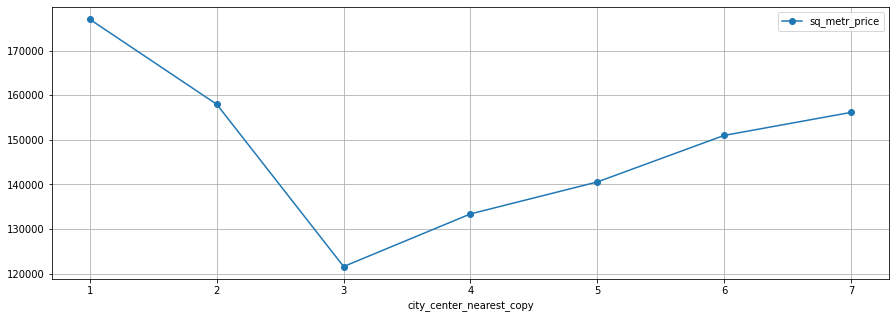

In [205]:
#df_centr_flat.pivot_table(index='city_center_nearest_copy', values='sq_metr_price').plot(figsize=(15,5), style='o-', grid=True)
df_centr_flat[df_centr_flat['city_center_nearest_copy'] > 0].pivot_table(index='city_center_nearest_copy', values='sq_metr_price').plot(figsize=(15,5), style='o-', grid=True)

<div class="alert alert-info">
<h2> Комментарий студента</h2>
Квартиры в самом центре стоят соответственно дорого. Но с удалением от центра цена падает, но после 3км снова растет, возможно это связанно с налицием магазинов и удобных транспортных развязок.

</div>

<AxesSubplot:xlabel='first_day_exposition'>

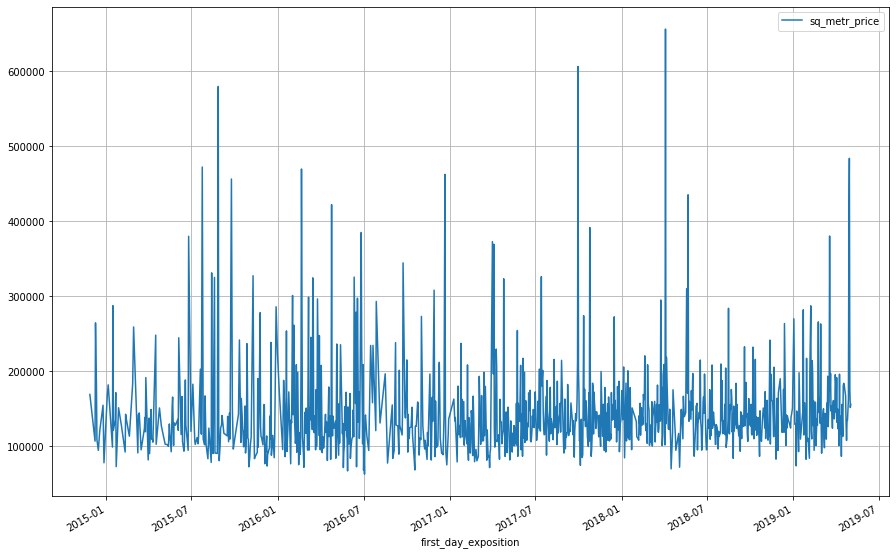

In [206]:
df_centr_flat.pivot_table(index='first_day_exposition', values='sq_metr_price').plot(figsize=(15,10), style='-', grid=True)

<div class="alert alert-info">
<h2> Комментарий студента</h2>
Даты указаны в формате - гг-мм-дд, но так как дни указать не получется возможным из-за масштаба, они опущенны.

</div>

In [207]:
df_centr_flat['first_day_exposition'].head(2)

3    2015-07-24
24   2015-10-31
Name: first_day_exposition, dtype: datetime64[ns]

## Общий вывод

Согласно полученным данным можно сделать вывод, что цена на квартиру зависит от : этажа, от удаленности вартиры от центра, от кол-ва комнат.
Так же данная работа наглядно показывает , что для анализа данных удобнее пользоваться графическими представлениями данных, нежели таблицами. 

<div class="alert alert-info">
<h2> Комментарий студента</h2>
    # Новый Общий вывод.
    
В ходе проделанной работы по выявлению зависимостей цен на квартиры в регионе Санкт-Петербурга и его окрестностей, были проработаны следующие зависимости, оказывающие влияние на ценообразование. А именно, влияние площади квартиры, кол-ва комнат, этажа, удаленности от центра на цену квартиры. Построенные графики говорят о том, что с увеличением площади квартиры растет и цена. Согласно полученному коэффициенту корреляции можно сказать, что связь между этими характеристиками существует. Первый этаж пользуется меньшим спросом у покупателей. Квартиры в самом центре стоят соответственно дорого, но после 3км цена начинает расти, возможно это связанно с наличием магазинов и удобных транспортных развязок. Так же квартир с общей площадью в районе 60м2 больше всего в центре. А существенное кол-во квартир находится в интервале общей площадью от 40м2 до 100м2. 

Имеем 7 пиков в интервале от 0 до 100 диапазона срока продаж квартир:

- Первый пик - 0 дней. Скорее всего это баг данных, не может быть что бы квартиры так быстро продавались в таком кол-ве. При определении быстрых и медленных продаж не будем брать во внимание этот пик

- Пятый пик - 60 дней. Второй по значению, про который можно сказать, если квартиру не продали до этого срока, это долгая продажа.
- Шестой пик - 74 дня. Самый малый пик из всех описанных.
- Седьмой пик - 90 дней. Сопоставим по объему продаж со вторым и третьим пиком.

Все озвученные характеристики и зависимости представленны в виде графиков в данной проектной работе.
</div>